# Lending Club Case Study

In [114]:
#Importing Necessary Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [58]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [59]:
#Creating Dataframe from The CSV file

loan = pd.read_csv('gdrive/My Drive/upgrad/loan.csv')

<ipython-input-59-e89e8e3d92e8>:3: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan = pd.read_csv('gdrive/My Drive/upgrad/loan.csv')


In [60]:
loan.head(10)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   
5  1075269    1311441       5000         5000           5000.0   36 months   
6  1069639    1304742       7000         7000           7000.0   60 months   
7  1072053    1288686       3000         3000           3000.0   36 months   
8  1071795    1306957       5600         5600           5600.0   60 months   
9  1071570    1306721       5375         5375           5350.0   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   
7   18.64%       109.43     E        E1            MKC Accounting     9 years   
8   21.28%       152.39     F        F2                        NaN    4 years   
9   12.69%       121.45     B        B5                  Starbucks   < 1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   
5           RENT     36000.0     Source Verified  Dec-11   Fully Paid   
6           RENT     47004.0        Not Verified  Dec-11   Fully Paid   
7           RENT     48000.0     Source Verified  Dec-11   Fully Paid   
8            OWN     40000.0     Source Verified  Dec-11  Charged Off   
9           RENT     15000.0            Verified  Dec-11  Charged Off   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   
7          n  https://lendingclub.com/browse/loanDetail.acti...   
8          n  https://lendingclub.com/browse/loanDetail.acti...   
9          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   
7    Borrower added on 12/16/11 > Downpayment for...                 car   
8    Borrower added on 12/21/11

In [61]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [62]:
loan.describe(include='all')

id     member_id     loan_amnt   funded_amnt  \
count   3.971700e+04  3.971700e+04  39717.000000  39717.000000   
unique           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN   
mean    6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std     2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min     5.473400e+04  7.069900e+04    500.000000    500.000000   
25%     5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%     6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%     8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max     1.077501e+06  1.314167e+06  35000.000000  35000.000000   

        funded_amnt_inv        term int_rate   installment  grade sub_grade  \
count      39717.000000       39717    39717  39717.000000  39717     39717   
unique              NaN           2      371           NaN      7        35   
top                 NaN   36 months   10.99%           NaN      B        B3   
freq                NaN       29096      956           NaN  12020      2917   
mean       10397.448868         NaN      NaN    324.561922    NaN       NaN   
std         7128.450439         NaN      NaN    208.874874    NaN       NaN   
min            0.000000         NaN      NaN     15.690000    NaN       NaN   
25%         5000.000000         NaN      NaN    167.020000    NaN       NaN   
50%         8975.000000         NaN      NaN    280.220000    NaN       NaN   
75%        14400.000000         NaN      NaN    430.780000    NaN       NaN   
max        35000.000000         NaN      NaN   1305.190000    NaN       NaN   

       emp_title emp_length home_ownership    annual_inc verification_status  \
count      37258      38642          39717  3.971700e+04               39717   
unique     28820         11              5           NaN                   3   
top      US Army  10+ years           RENT           NaN        Not Verified   
freq         134       8879          18899           NaN               16921   
mean         NaN        NaN            NaN  6.896893e+04                 NaN   
std          NaN        NaN            NaN  6.379377e+04                 NaN   
min          NaN        NaN            NaN  4.000000e+03                 NaN   
25%          NaN        NaN            NaN  4.040400e+04                 NaN   
50%          NaN        NaN            NaN  5.900000e+04                 NaN   
75%          NaN        NaN            NaN  8.230000e+04                 NaN   
max          NaN        NaN            NaN  6.000000e+06                 NaN   

       issue_d loan_status pymnt_plan  \
count    39717       39717      39717   
unique      55           3          1   
top     Dec-11  Fully Paid          n   
freq      2260       32950      39717   
mean       NaN         NaN        NaN   
std        NaN         NaN        NaN   
min        NaN         NaN        NaN   
25%        NaN         NaN        NaN   
50%        NaN         NaN        NaN   
75%        NaN         NaN        NaN   
max        NaN         NaN        NaN   

                                                      url   desc  \
count                                               39717  26775   
unique                                              39717  26526   
top     https://lendingclub.com/browse/loanDetail.acti...          
freq                                                    1    210   
mean                                                  NaN    NaN   
std                                                   NaN    NaN   
min                                                   NaN    NaN   
25%                                                   NaN    NaN   
50%                                                   NaN    NaN   
75%                                                   NaN    NaN   
max                                                   NaN    NaN   

     

**Check duplicates in the ID column**

In [63]:
duplicate= loan['id'].duplicated()

In [64]:
check_dup = duplicate.any()

In [65]:
check_dup

False

In [66]:
#So there are no duplicates ID

In [67]:
#Count total Number of Nulls for each Column in the dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
cnt_missing_loan = loan.isnull().sum()

In [68]:
cnt_missing_loan

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12942
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [69]:
# Calculate percentage of nulls for each Column in the dataset
missing_percentage = (loan.isnull().sum() / len(loan)) * 100
missing_percentage

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.585543
purpose                             0.000000
title                               0.027696
zip_code  

In [70]:
# Count the number of unique values for each Column in the dataset
loan.nunique()

id                                39717
member_id                         39717
loan_amnt                           885
funded_amnt                        1041
funded_amnt_inv                    8205
term                                  2
int_rate                            371
installment                       15383
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                         5318
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26526
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                2868


In [71]:
#Check unique values for a particular Column -Equivalent to select disctinct in SQL
loan['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [72]:
#Check datatypes of each Column
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [73]:
# Get value counts for a specific column, for example 'loan_status'
loan['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [74]:
#Get an idea of the purpose of the loan
loan['purpose'].value_counts()

purpose
debt_consolidation    18641
credit_card            5130
other                  3993
home_improvement       2976
major_purchase         2187
small_business         1828
car                    1549
wedding                 947
medical                 693
moving                  583
vacation                381
house                   381
educational             325
renewable_energy        103
Name: count, dtype: int64

<Axes: >

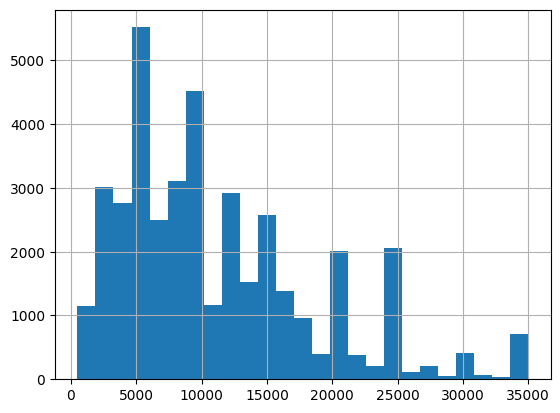

In [75]:
loan['loan_amnt'].hist(bins=25)

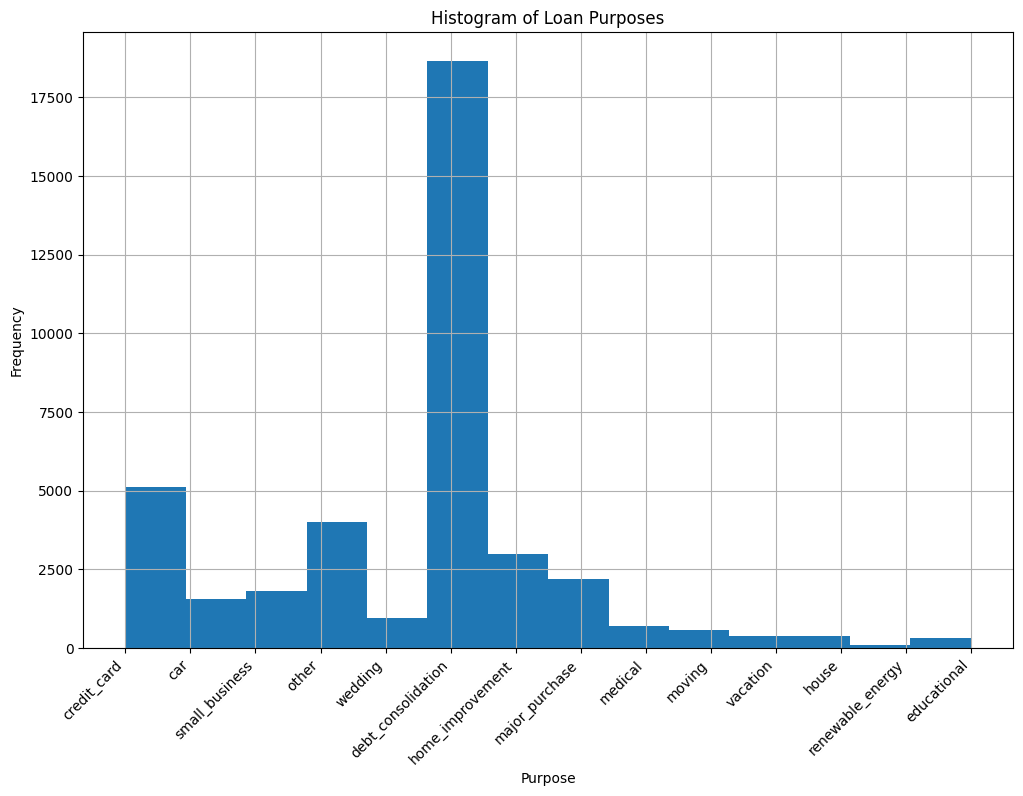

In [76]:
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
loan['purpose'].hist(bins=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Show the plot
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Purposes')
plt.show()

In [77]:
#Correlation Checks
loan.corr()

ValueError: could not convert string to float: ' 36 months'

In [78]:
corr_data = loan.corr()

ValueError: could not convert string to float: ' 36 months'

In [ ]:
# Setting a Threshold value

threshold = 0.5
sig_corr = corr_data[(corr_data.abs() > threshold) & (corr_data.abs() !=1.0)]
# Display the significant correlations
print(sig_corr)

**DATA CLEANING**

In [80]:
#we calculated missing percentage above during initial analysis , we will use that to remove
#columns which have more than 50 percent values missing
missing_percentage[missing_percentage>50]

mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi                            100.000000
total_cu_t

In [81]:
missing_percentage[missing_percentage>50].index

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [82]:
drop_col = missing_percentage[missing_percentage > 50].index

In [83]:
#drop all those columns which have more than 50 percent null values
loan_clean = loan.drop(columns = drop_col)

In [84]:
loan_clean.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65            0   
1                  bike    309xx         GA   1.00            0   
2  real estate business    606xx         IL   8.72            0   
3              personel    917xx         CA  20.00            0   
4              Personal    972xx         OR  17.94            0   

  earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal revol_util  \
0           Jan-85               1         3        0      13648     83.70%   
1           Apr-99               5         3        0       1687      9.40%   
2           Nov-01               2         2        0       2956     98.50%   
3           Feb-96               1        10        0       5598        21%   
4           Jan-96               0        15        0      27783     53.90%   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0          9                   f       0.00           0.00   5863.155187   
1          4                   f       0.00           0.00   1008.710000   
2         10                   f       0.00           0.00   3005.666844   
3         37                   f       0.00           0.00  12231.890000   
4         38                   f     524.06         524.06   3513.330000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5833.84          5000.00         863.16                0.00   
1          1008.71           456.46         435.17                0.00   
2          3005.67          2400.00         605.67                0.00   
3         12231.89         10000.00        2214.92               16.97   
4          3513.33          2475.94        1037.39                0.00   

   

In [85]:
print("\nColumns dropped due to significant missing values:")
print(drop_col)


Columns dropped due to significant missing values:
Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_

In [86]:
#Filling missing values in numerical data with median

num_data_loan= loan_clean.select_dtypes(include=['float64', 'int64']).columns

In [87]:
num_data_loan

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [88]:
#Filling Missing values in numerical Columns with median values
loan_clean[num_data_loan]= loan_clean[num_data_loan].apply(lambda x: x.fillna(x.median()) )

In [89]:
loan_clean.shape

(39717, 54)

In [90]:
categorical_data = loan_clean.select_dtypes(include=['object']).columns

In [91]:
categorical_data

Index(['term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status',
       'last_pymnt_d', 'last_credit_pull_d', 'application_type'],
      dtype='object')

In [92]:
loan_clean[categorical_data] = loan_clean[categorical_data].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else x))

In [93]:
loan_clean.shape

(39717, 54)

In [94]:
missing_value_after_cleaning = loan_clean.isnull().sum().sum()

In [95]:
missing_value_after_cleaning

0

In [96]:
missing_value_after_cleaning1 = loan_clean.isnull().sum()
missing_value_after_cleaning1

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
desc                          0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_ut

In [97]:
# Command to show total unique values for each column
unique_values = loan_clean.nunique()

In [98]:
unique_values

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26526
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [99]:
#Excluding columns which have just one unique value
loan_clean = loan_clean.loc[:, loan_clean.nunique() > 1]#select all rows and only those columns where condition is true

In [100]:
loan_clean.nunique()

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
desc                       26526
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util

In [101]:
loan_clean.shape

(39717, 45)

**Data Standardization**

In [102]:
#Creating a copy so that we do not change the original cleaned data
loan_clean_new= loan_clean.copy()


In [103]:
#Convert String Percentages to Float Data Type

loan_clean_new['int_rate'] = loan_clean_new['int_rate'].str.replace('%', '').astype(float)
loan_clean_new['revol_util'] = loan_clean_new['revol_util'].str.replace('%', '').astype(float)

In [104]:
#Convert date columns to datetime
date_columns = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for col in date_columns:
    loan_clean_new[col] = pd.to_datetime(loan_clean_new[col], errors='coerce')


<ipython-input-104-e4182d618733>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_clean_new[col] = pd.to_datetime(loan_clean_new[col], errors='coerce')
<ipython-input-104-e4182d618733>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_clean_new[col] = pd.to_datetime(loan_clean_new[col], errors='coerce')
<ipython-input-104-e4182d618733>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  loan_clean_new[col] = pd.to_datetime(loan_clean_new[col], errors='coerce')
<ipython-input-104-e4182d618733>:4: UserWarning: Could not infer format, so each element will be parsed indiv

In [105]:
#Convert emp_length from string to float
loan_clean_new['emp_length'] = loan_clean_new['emp_length'].replace({'10+ years': '10', '< 1 year': '0.5', 'n/a': '0'})
loan_clean_new['emp_length'] = loan_clean_new['emp_length'].str.extract('(\d+)').astype(float)
#Extracted the numerical part from the string , and for those where it was greater than or less then , we have fixed a value

In [106]:
loan_clean_new.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                          float64
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                        float64
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                    datetime64[ns]
loan_status                        object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                         object
dti                               

In [107]:
# Check for duplicates
duplicate_rows = loan_clean_new.duplicated().sum()
#As checked there are no duplicates so no requirement of removing duplicates

**Analysis of Columns**

In [108]:
#id - unique identifier , not useful for analysis
#member_id - unique identifier of borrower, not useful
# url - not useful
# desc -loan description , may not be quantifiable , may or may not be useful for analysis
# title -it is similar to purpose , just the title provided by borrower-not structured
# zip code - can be useful for analysis area wise, butmay not be useful for prediction
# Policy code has been removed while cleaning as it had just 1 value
#
#
#

In [109]:
loan_clean_new['verification_status'].unique()


array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [110]:
#Updating the categorical data verification_status to replace source verified to verified
loan_clean_new['verification_status'] = loan_clean_new['verification_status'].replace('Source Verified', 'Verified')

In [111]:
loan_clean_new['verification_status'].unique()


array(['Verified', 'Not Verified'], dtype=object)

In [115]:
numerical_columns_new = loan_clean_new.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns_new = loan_clean_new.select_dtypes(include=[object]).columns.tolist()

In [116]:
numerical_columns_new

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'emp_length',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'pub_rec_bankruptcies']

In [117]:
categorical_columns_new

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state']

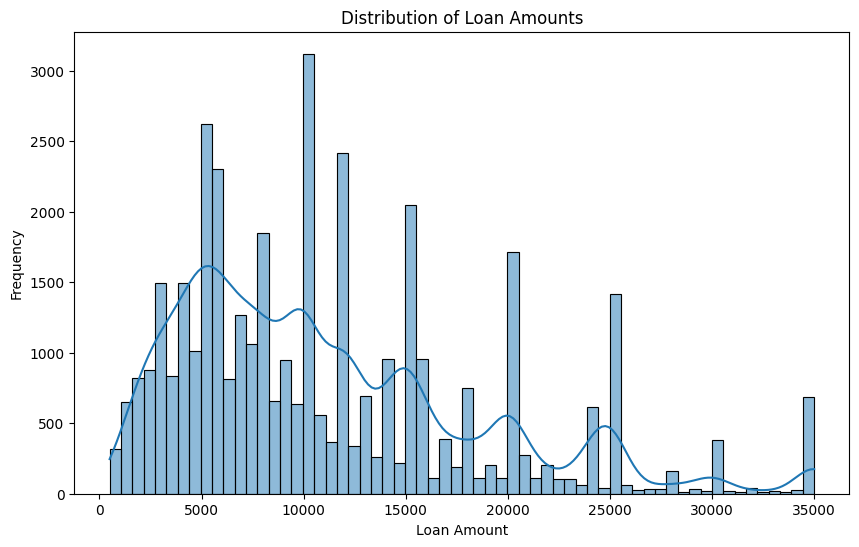

In [121]:
# Univariate Analysis
# Plot distribution of loan amounts
plt.figure(figsize=(10, 6))
sns.histplot(loan_clean_new['loan_amnt'], kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


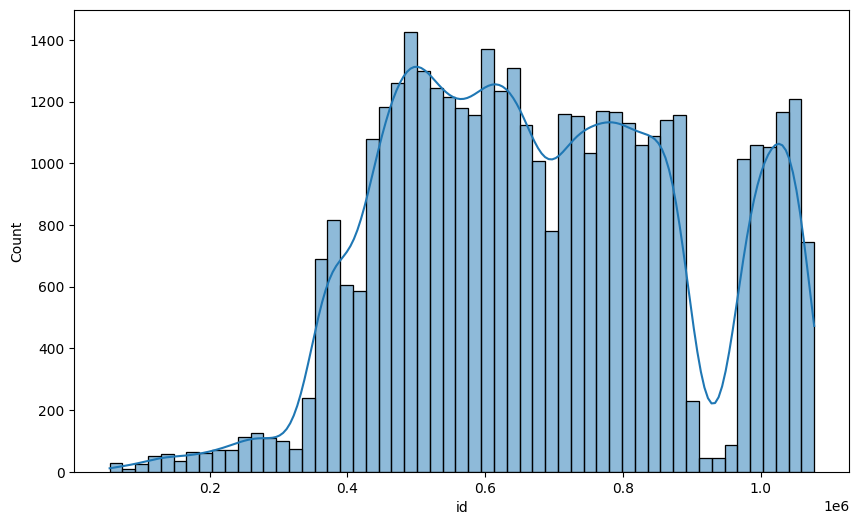

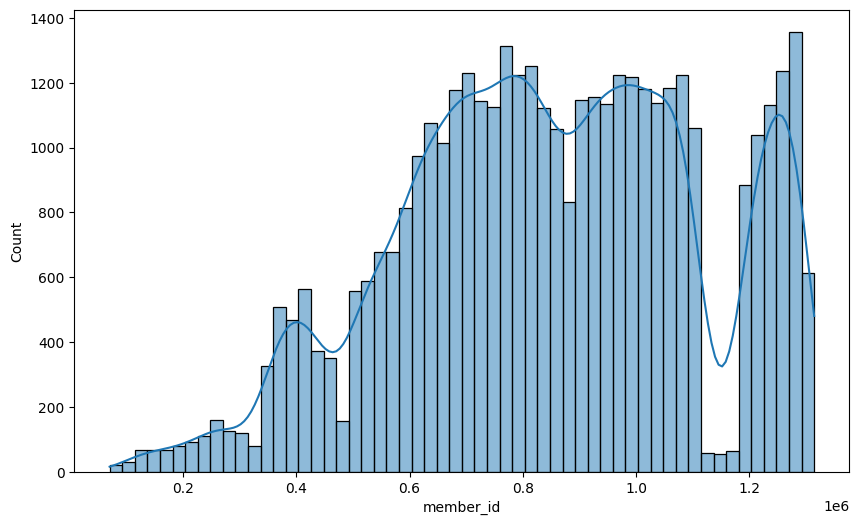

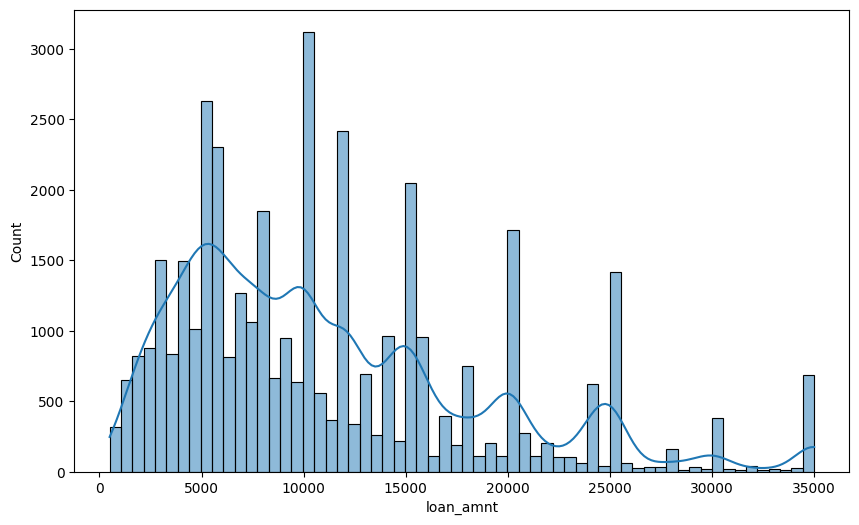

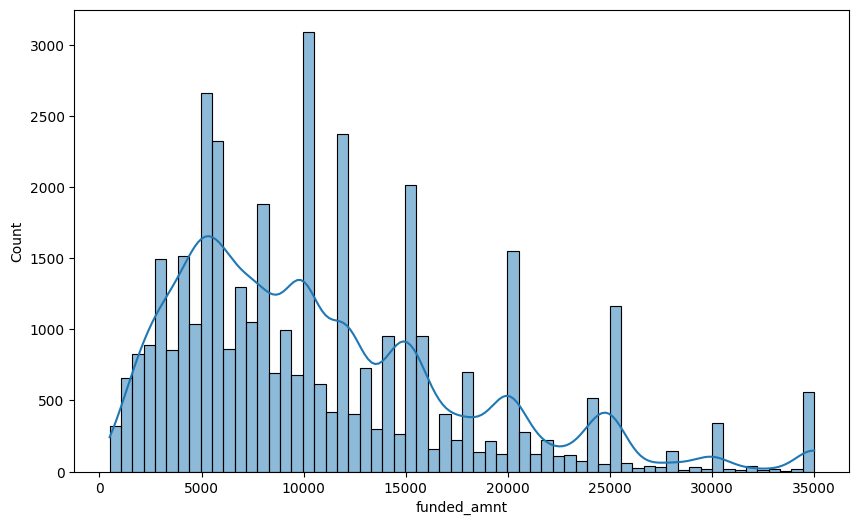

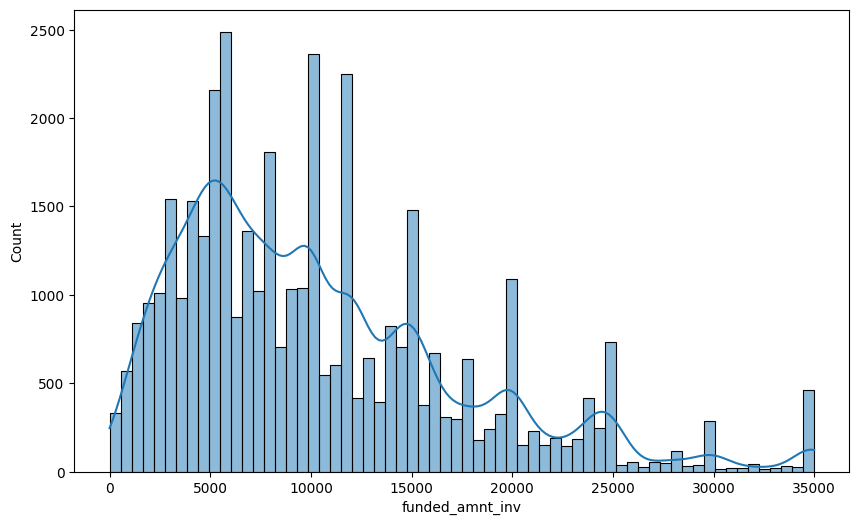

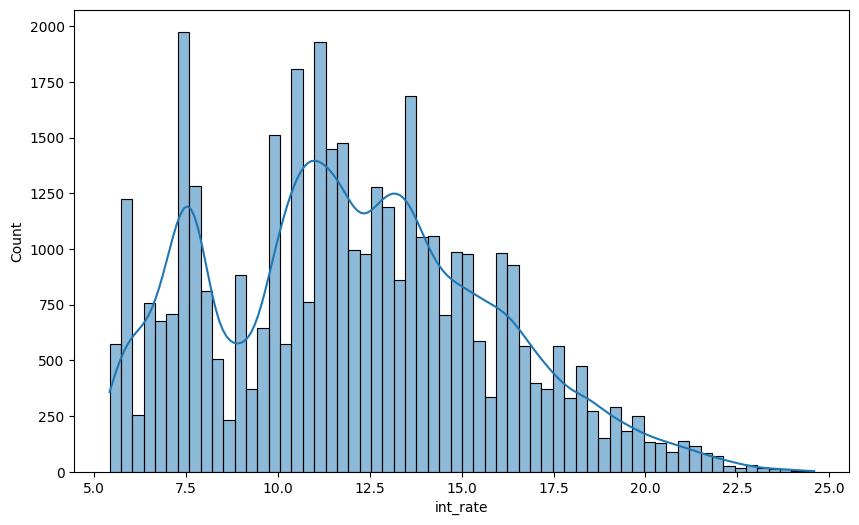

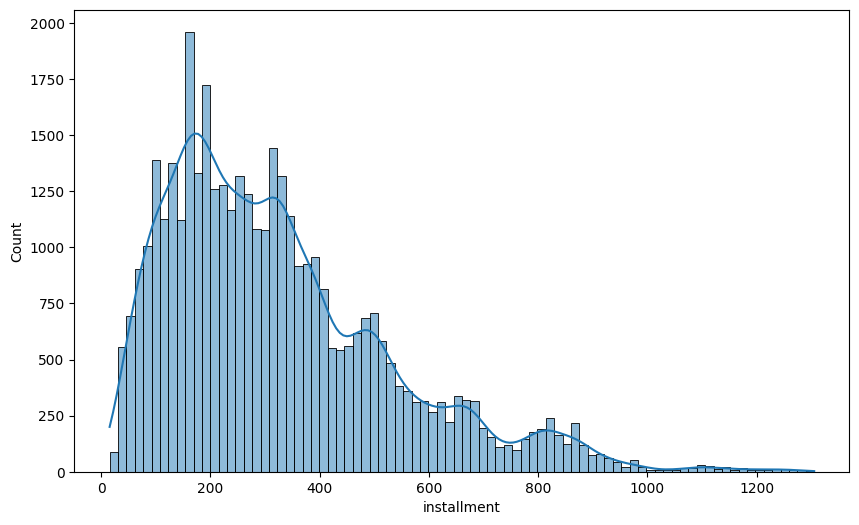

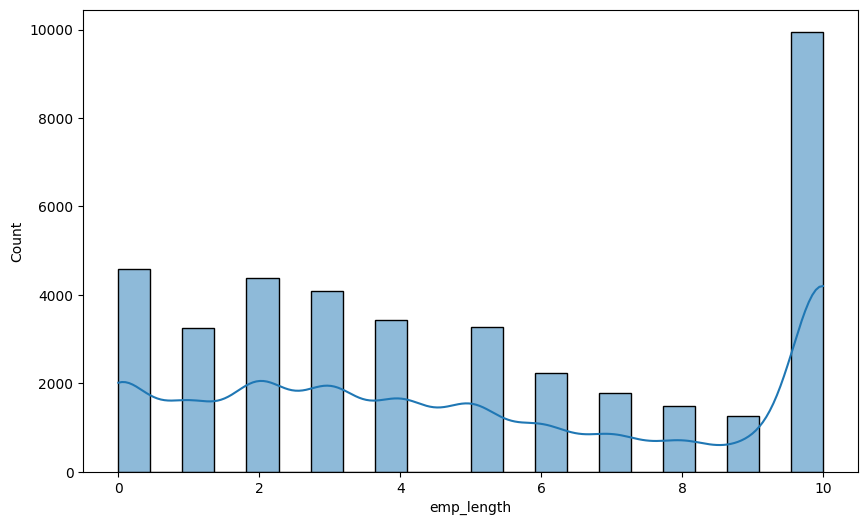

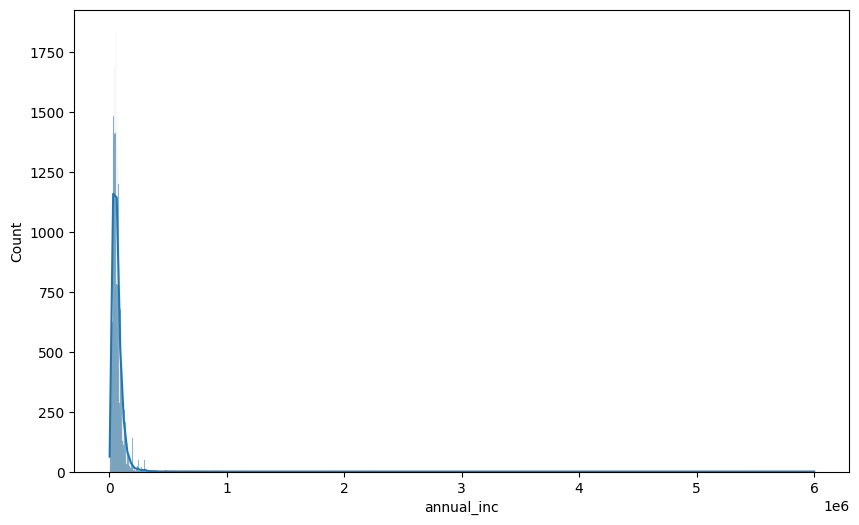

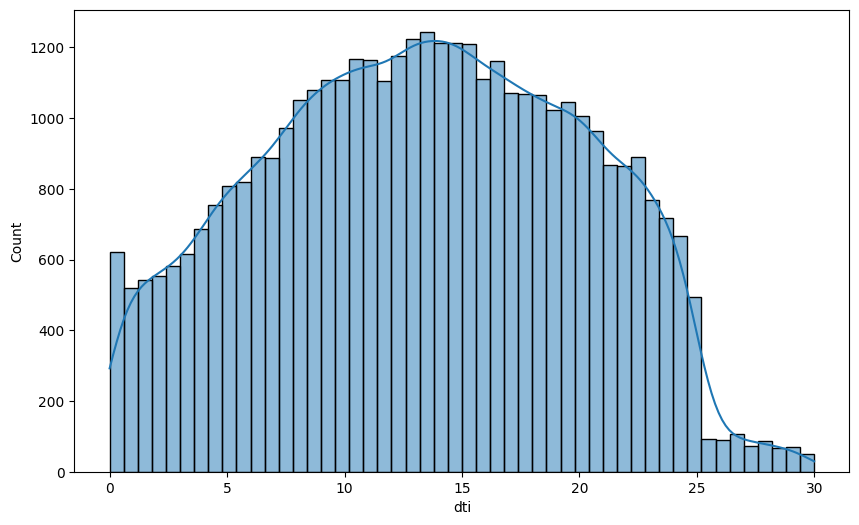

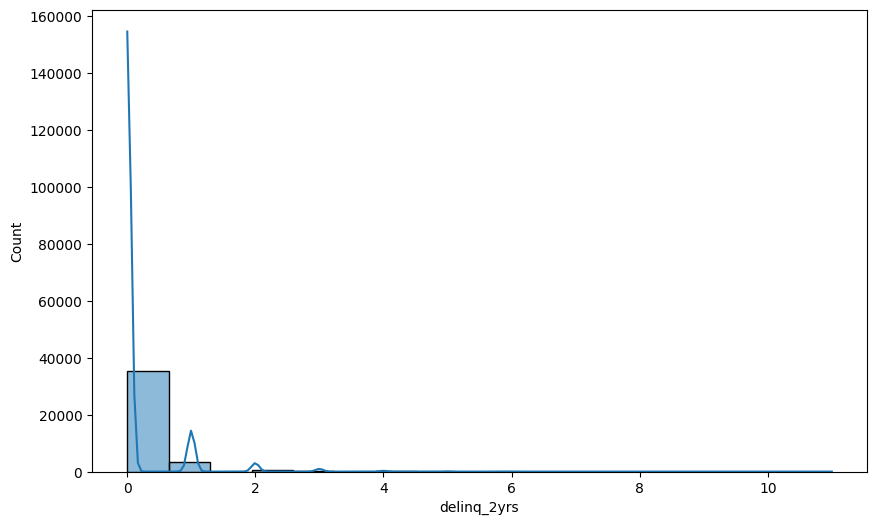

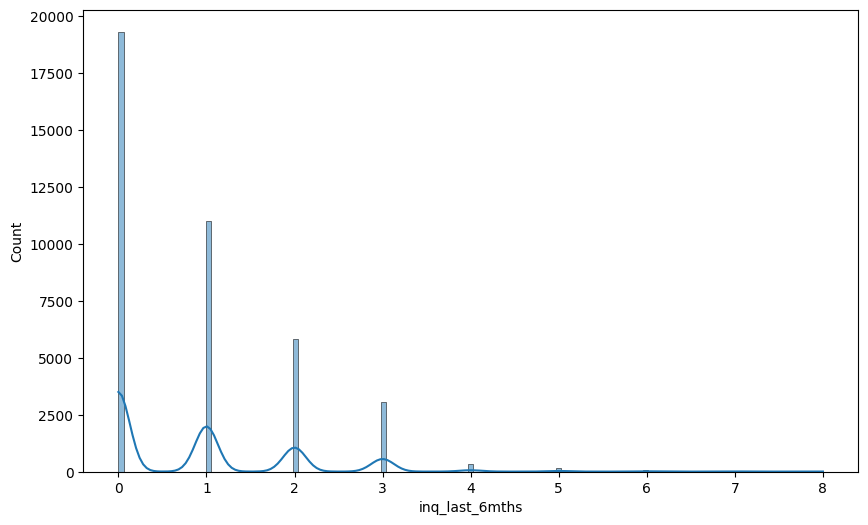

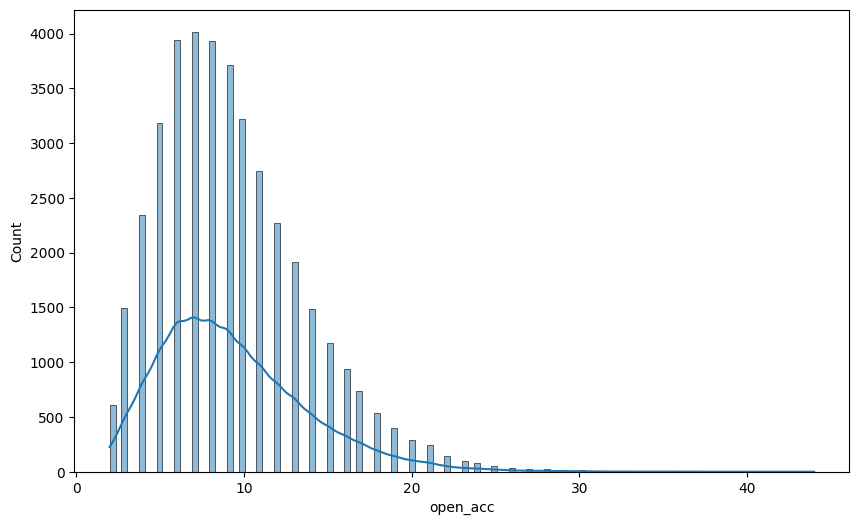

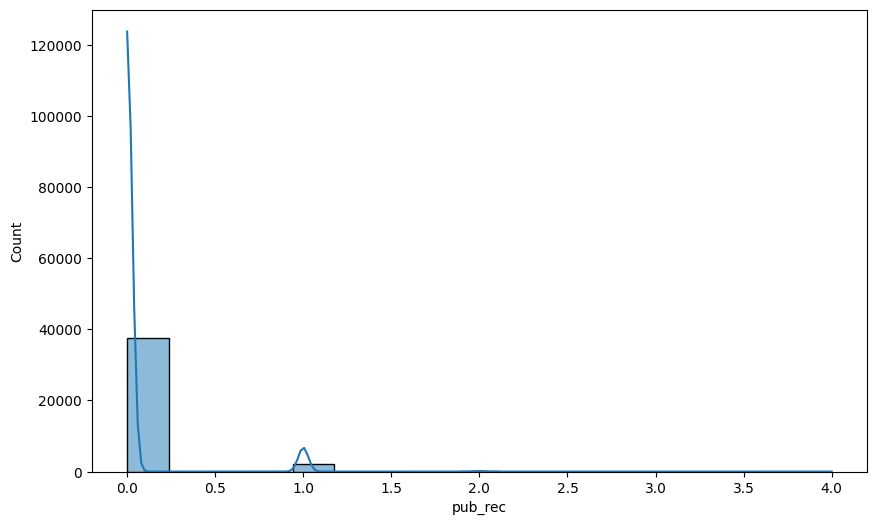

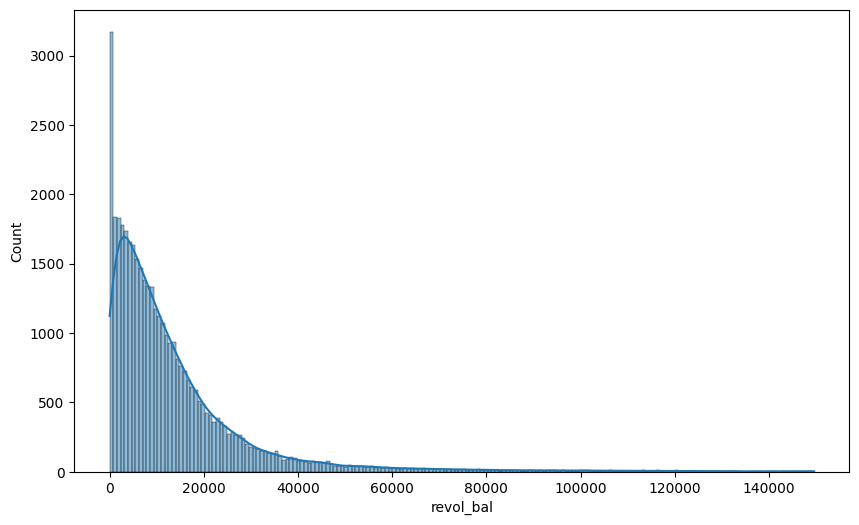

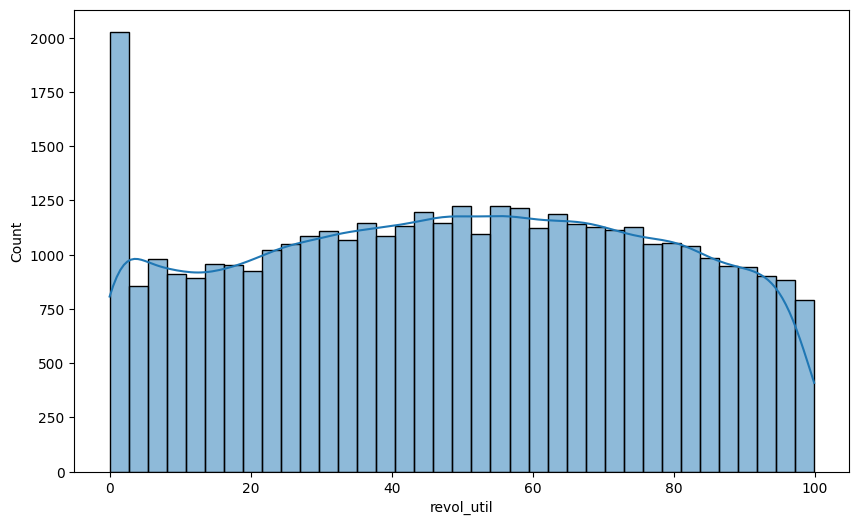

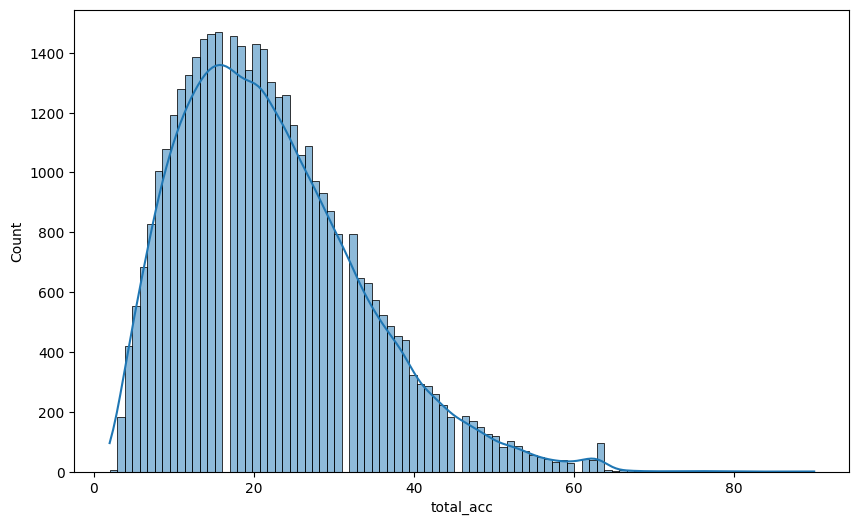

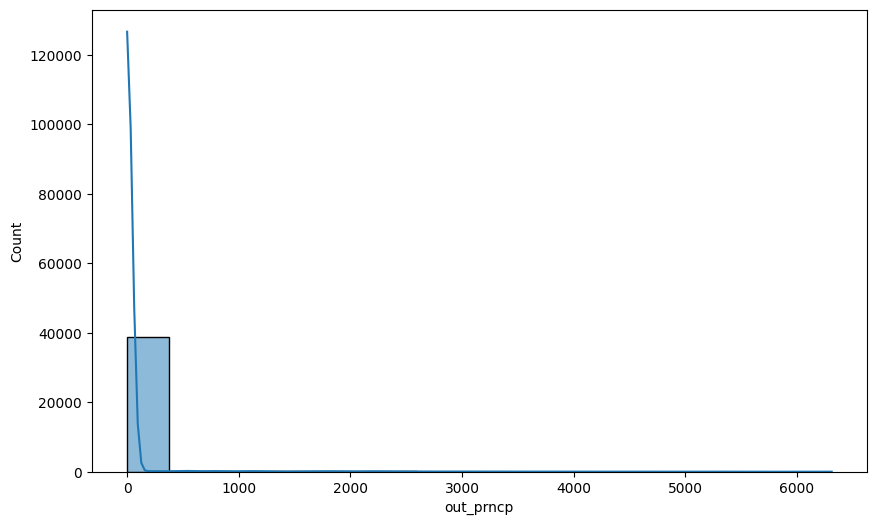

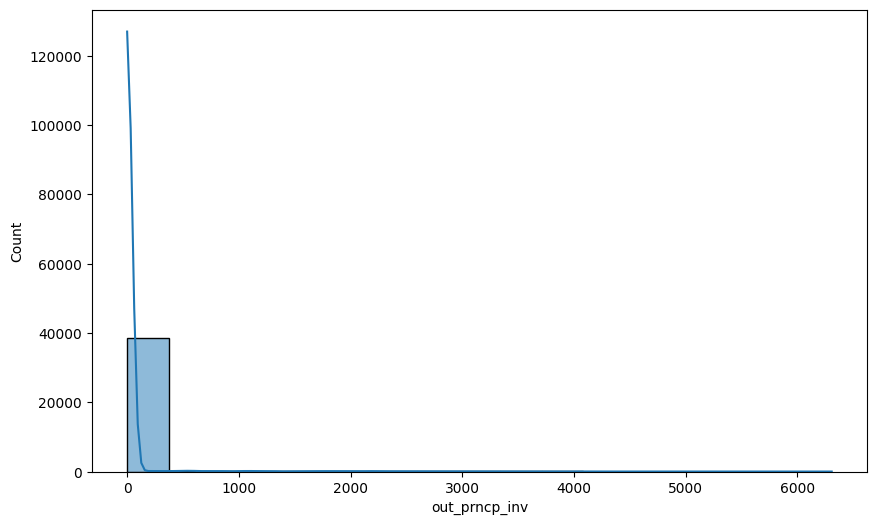

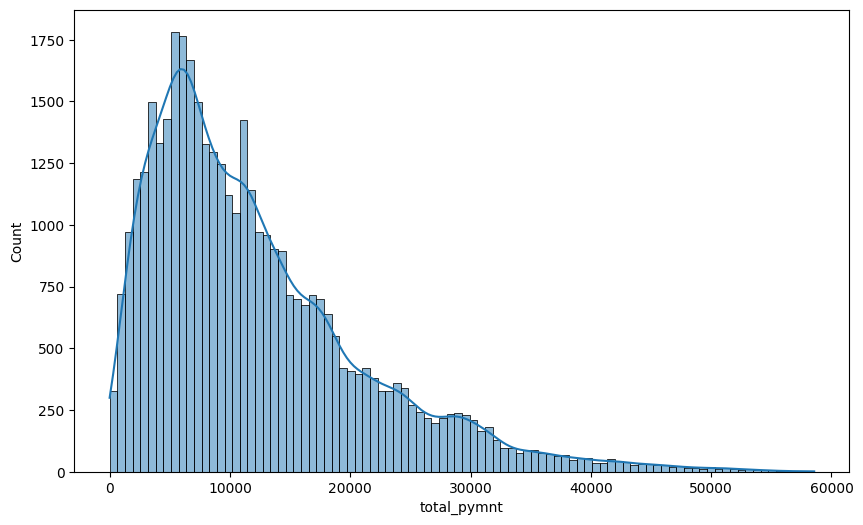

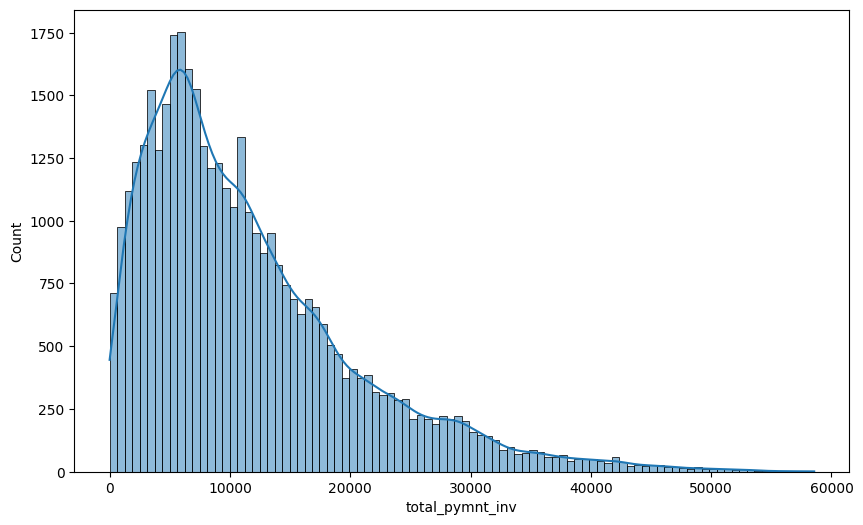

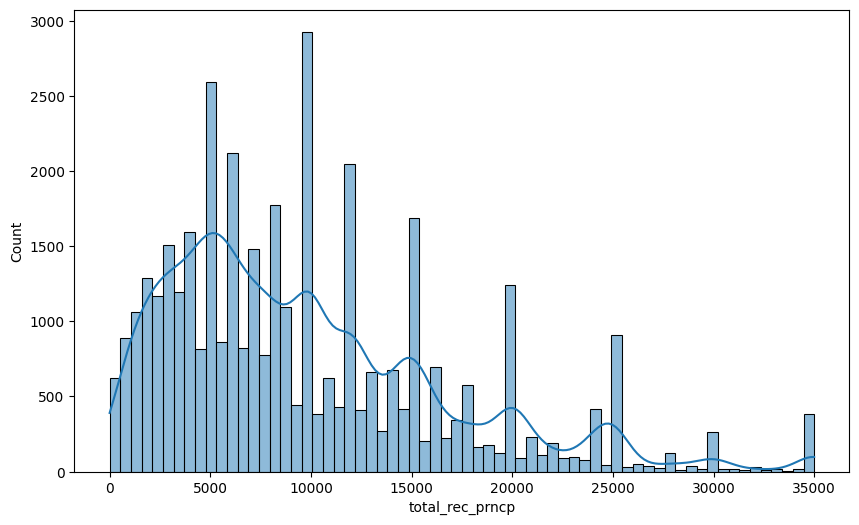

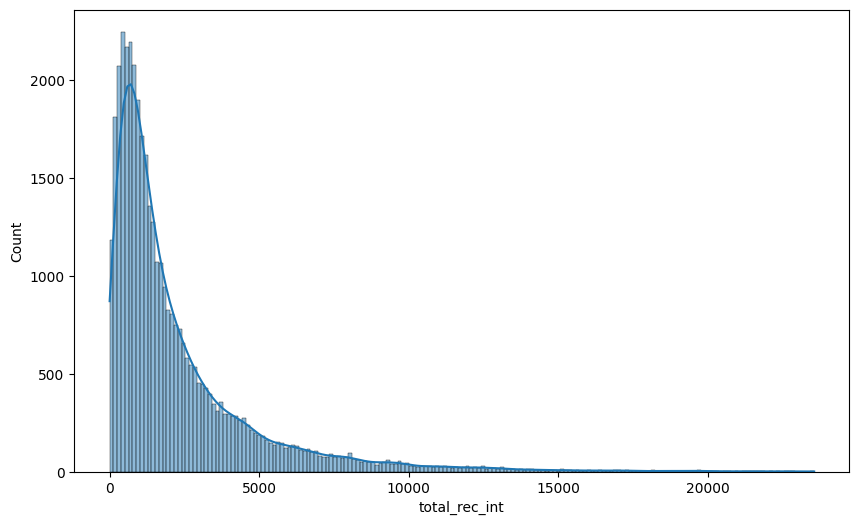

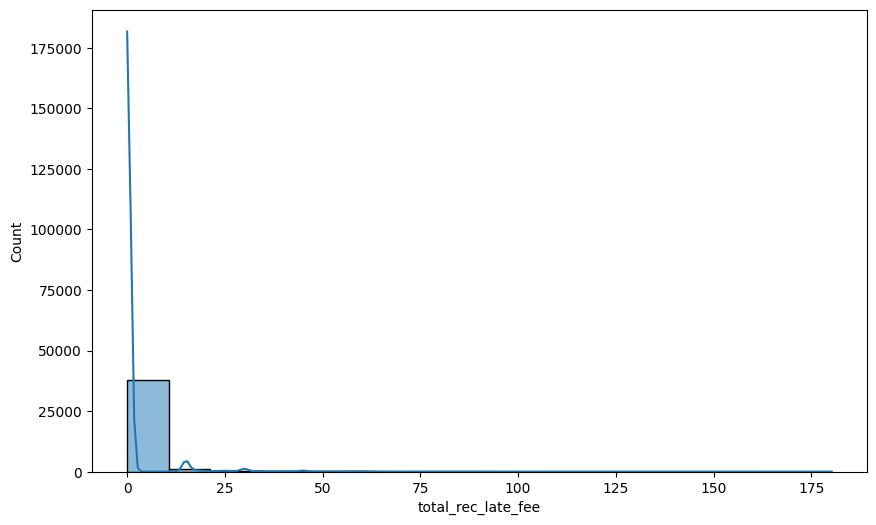

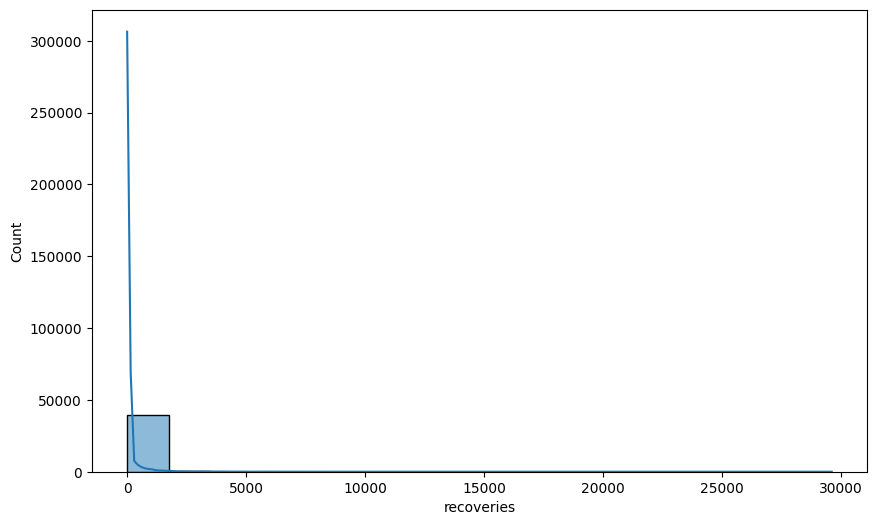

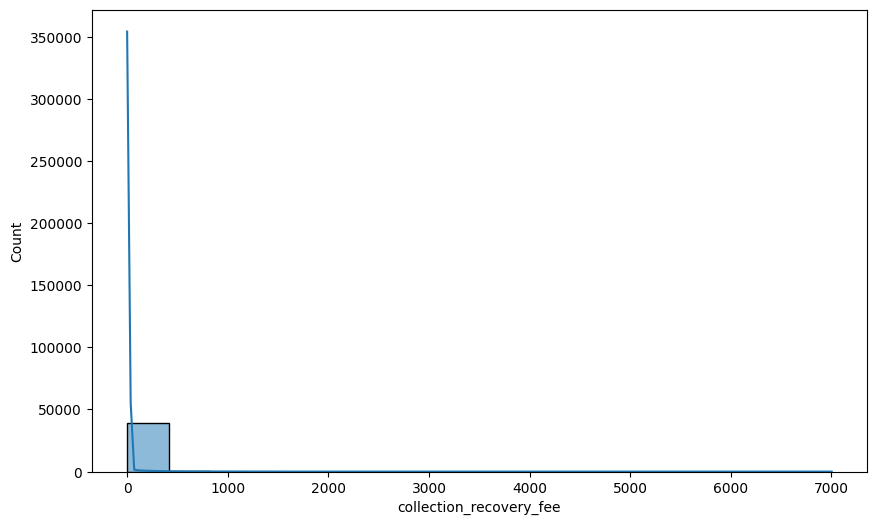

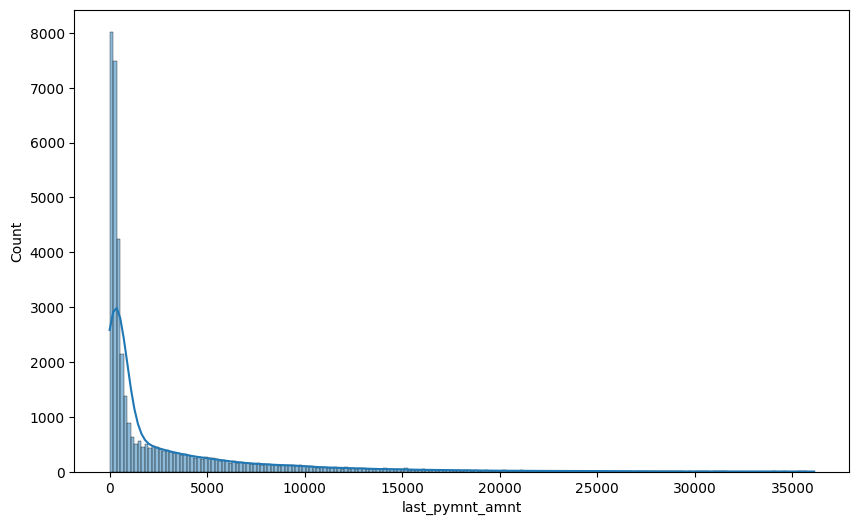

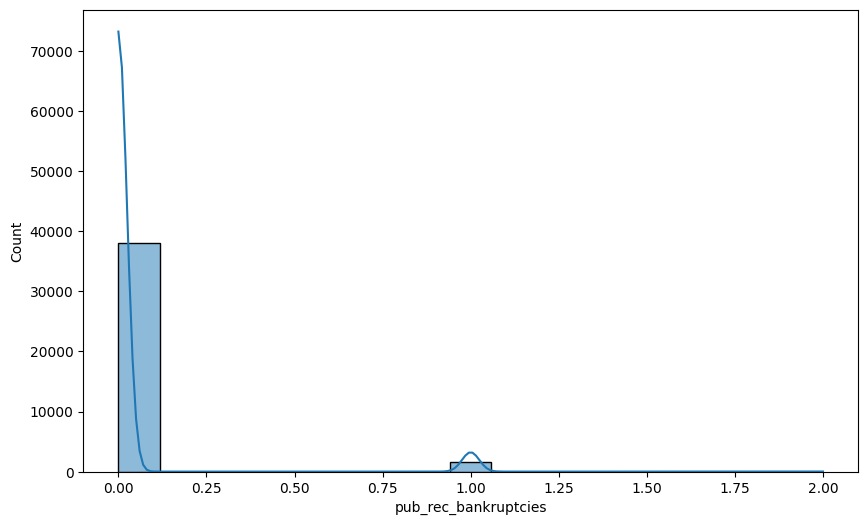

In [123]:
# for numerical columns
for i in numerical_columns_new:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=loan_clean_new[i], kde=True)
    plt.show()

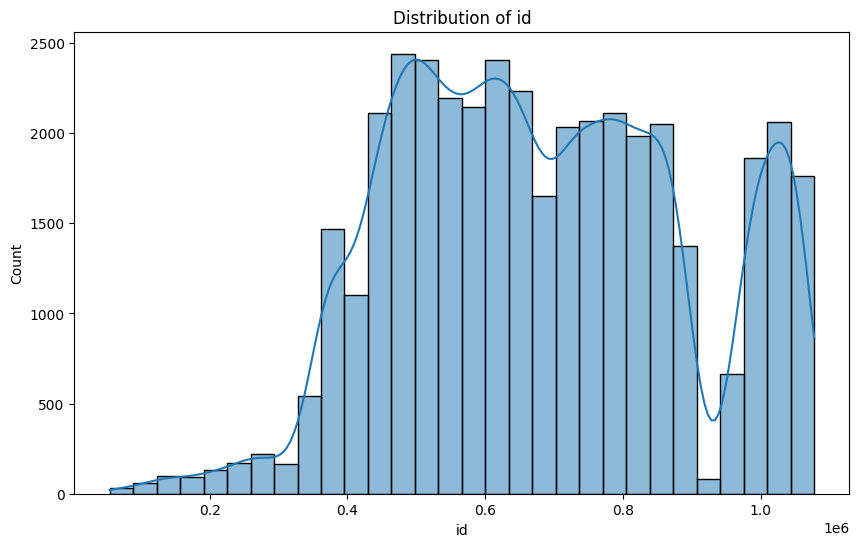

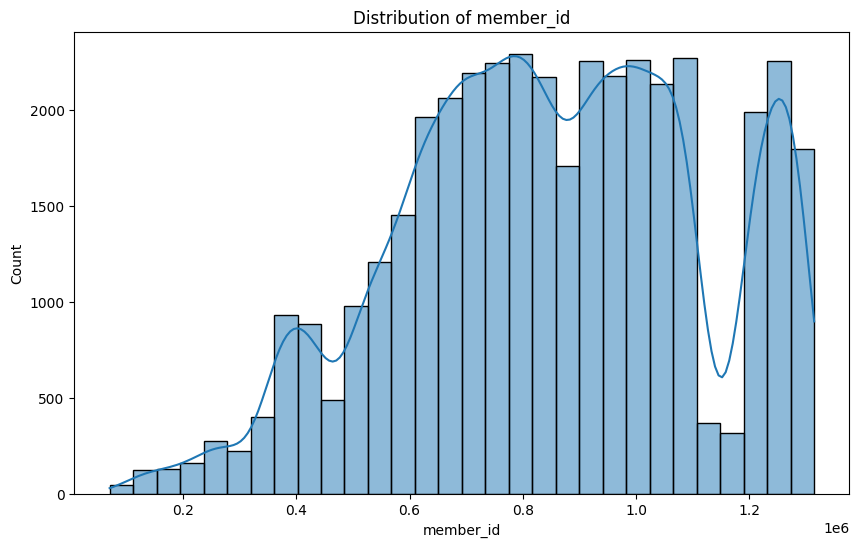

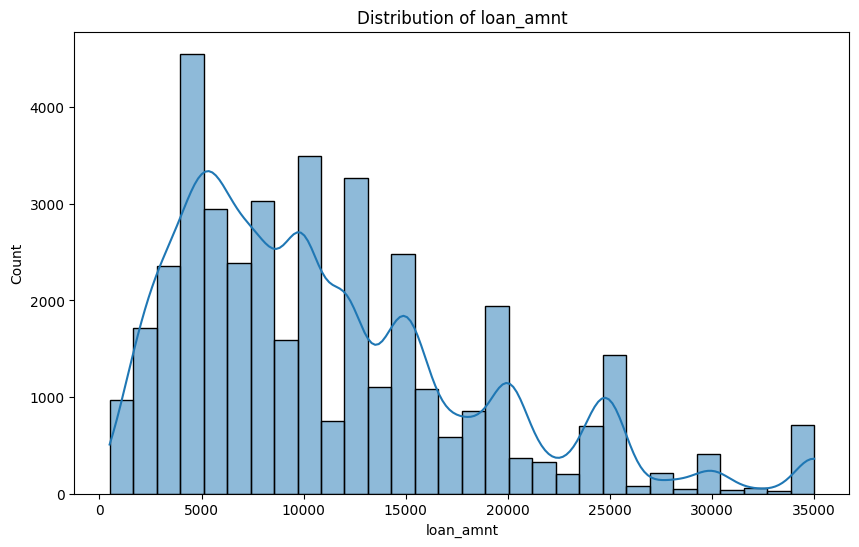

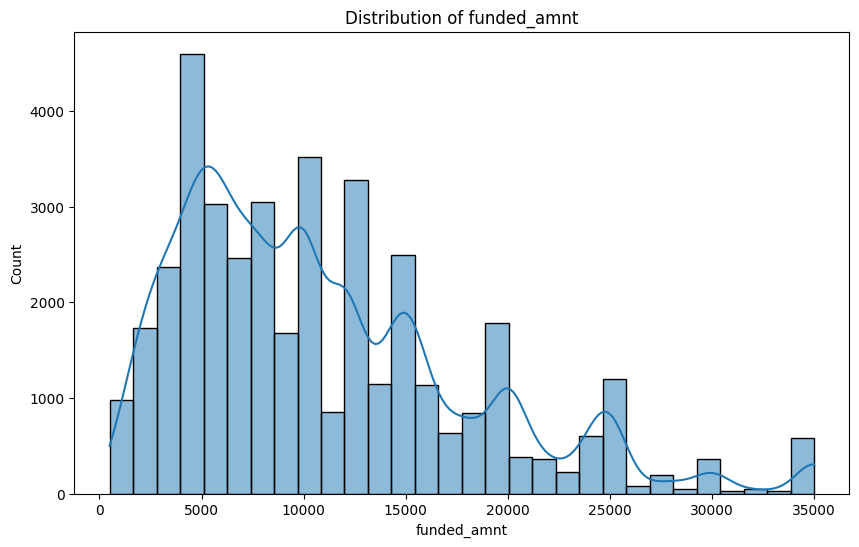

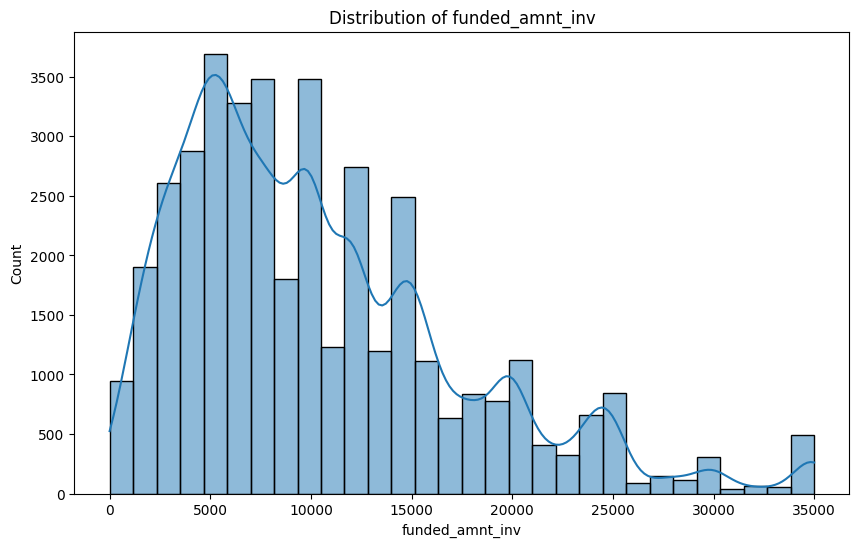

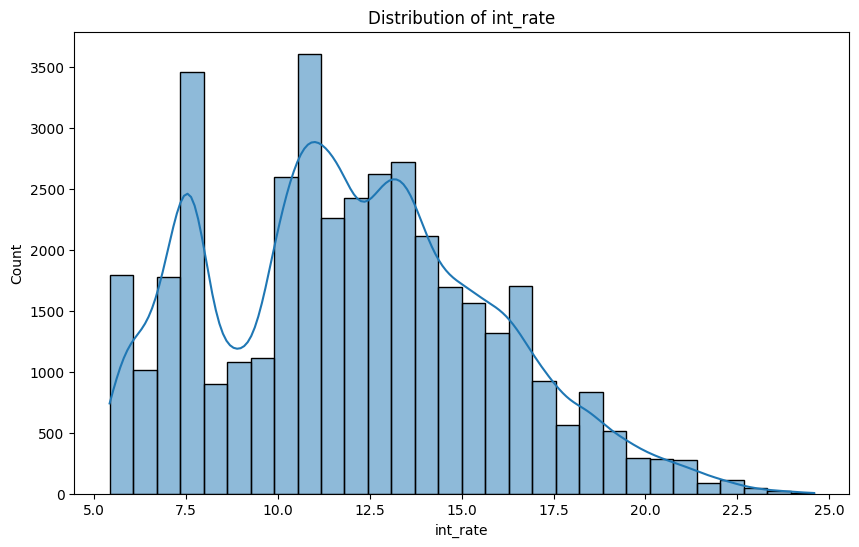

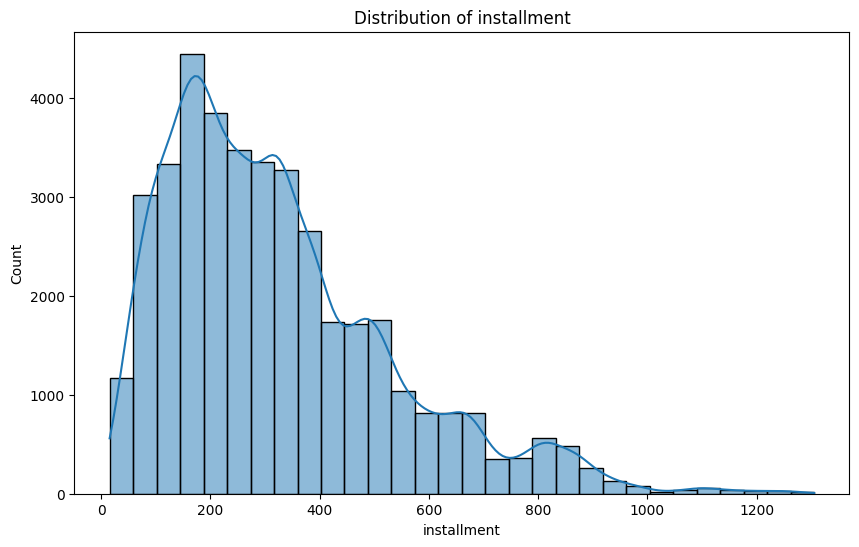

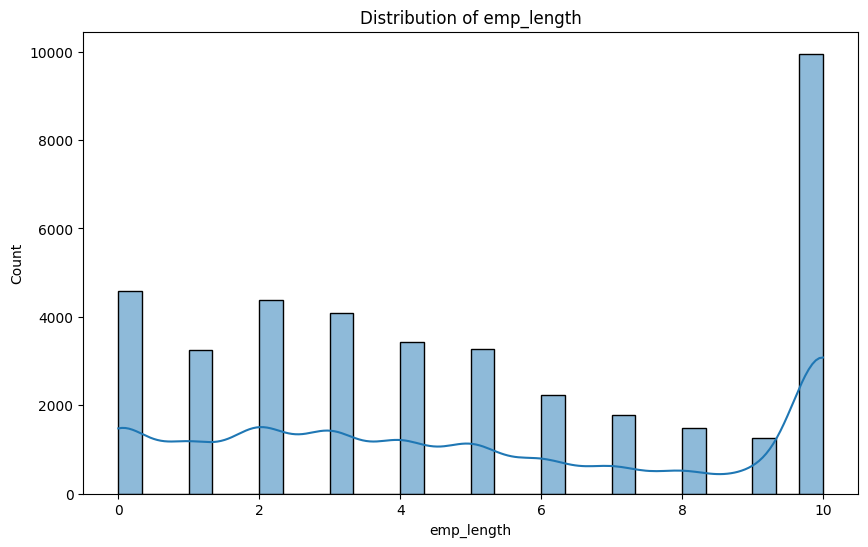

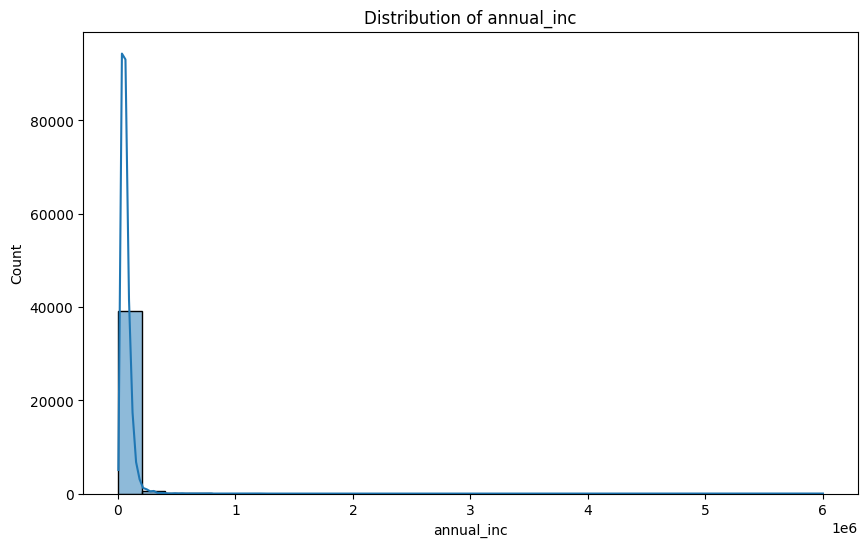

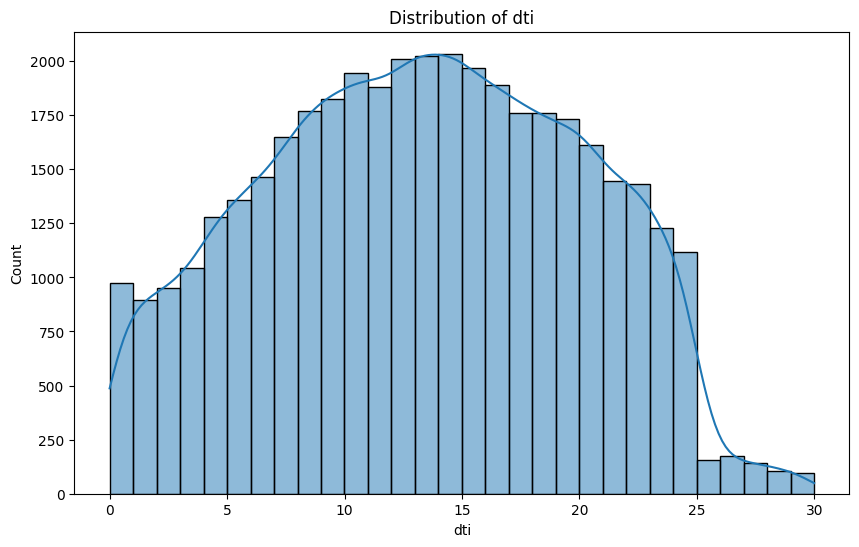

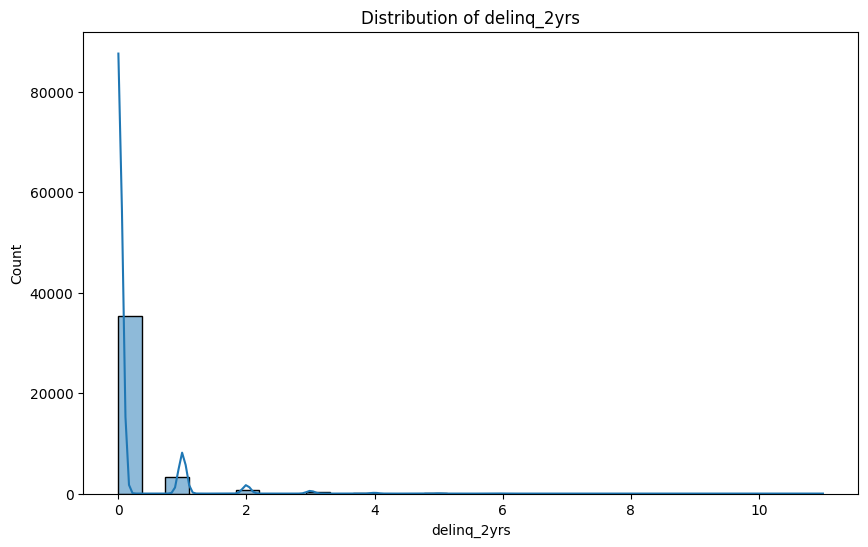

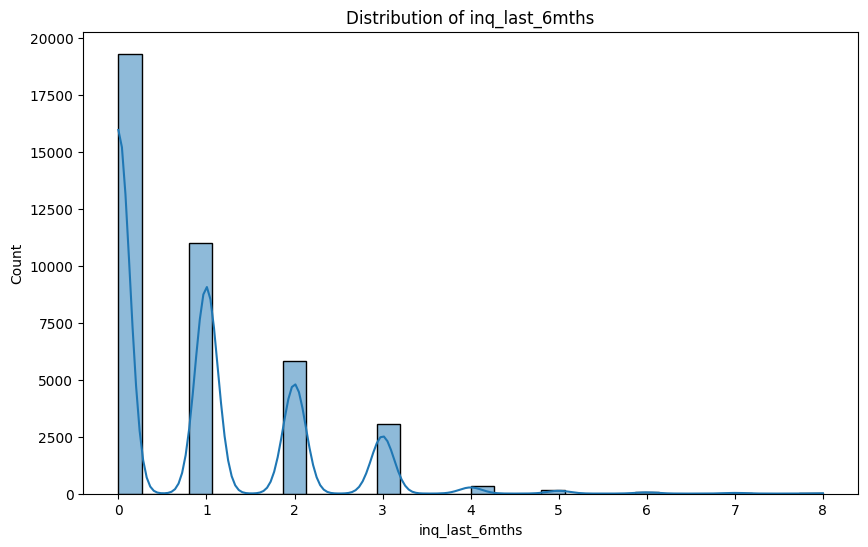

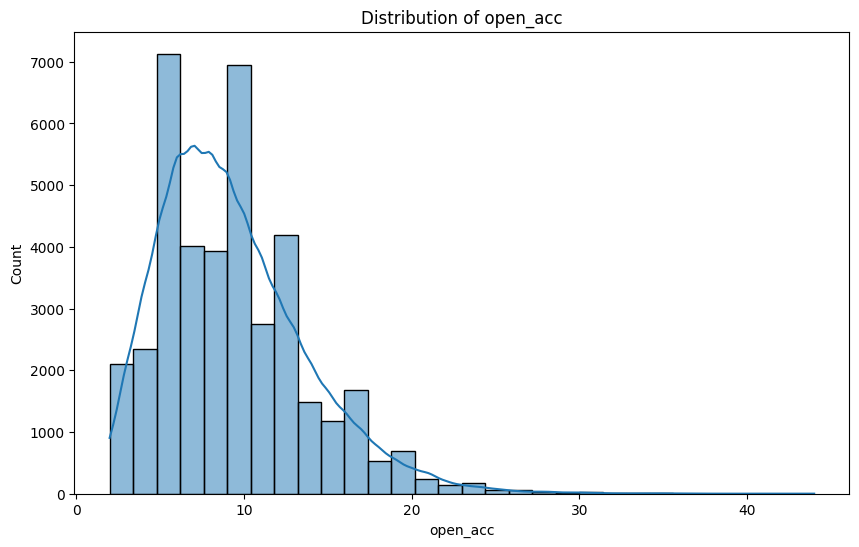

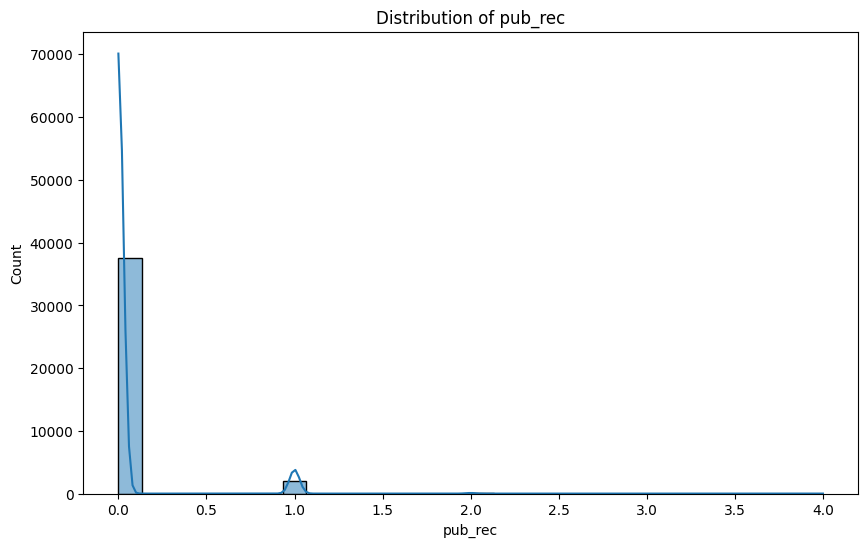

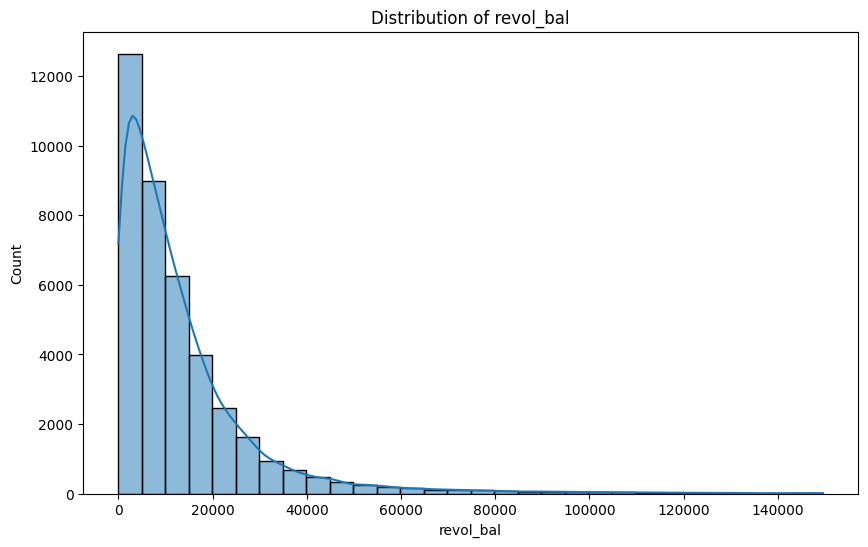

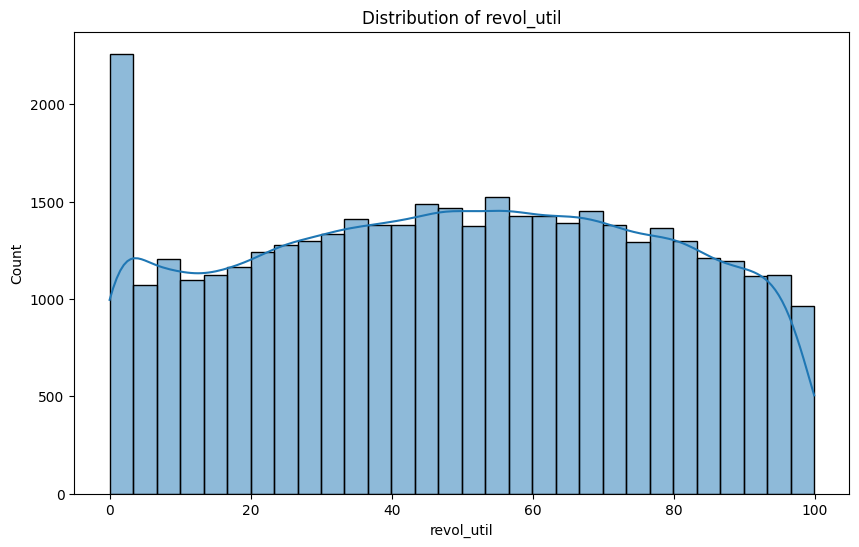

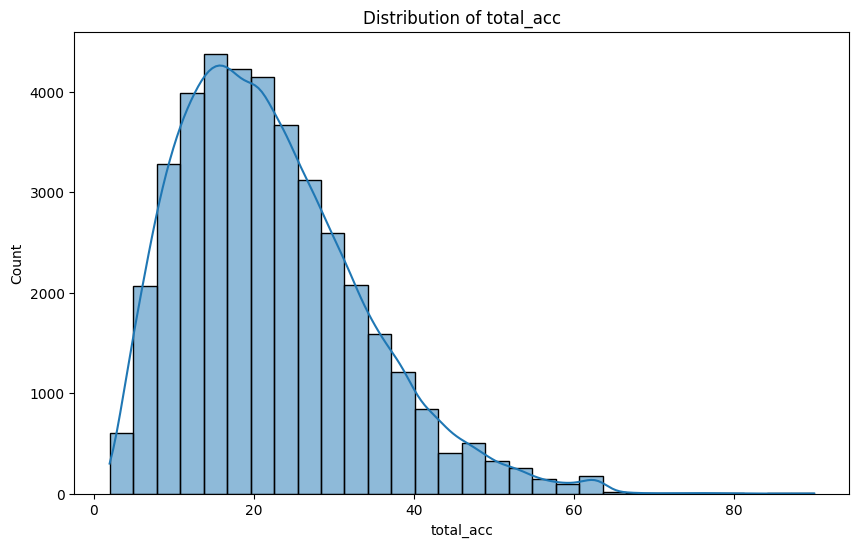

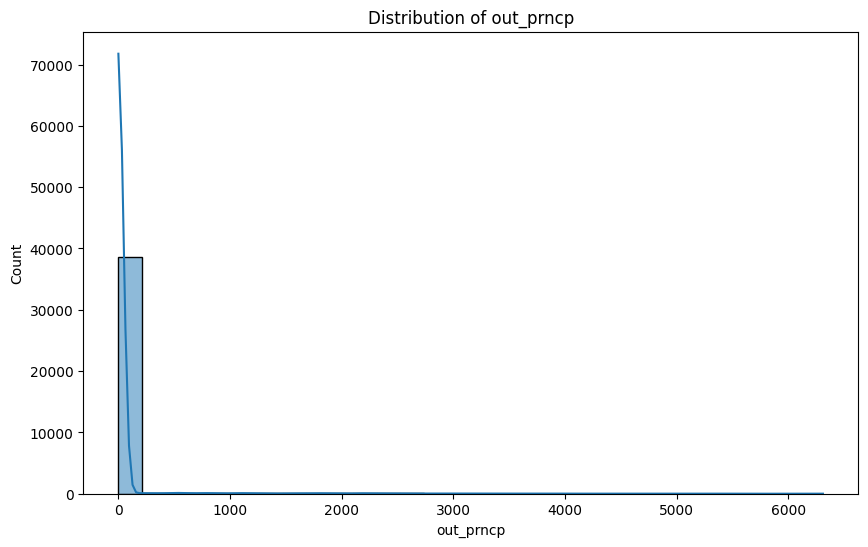

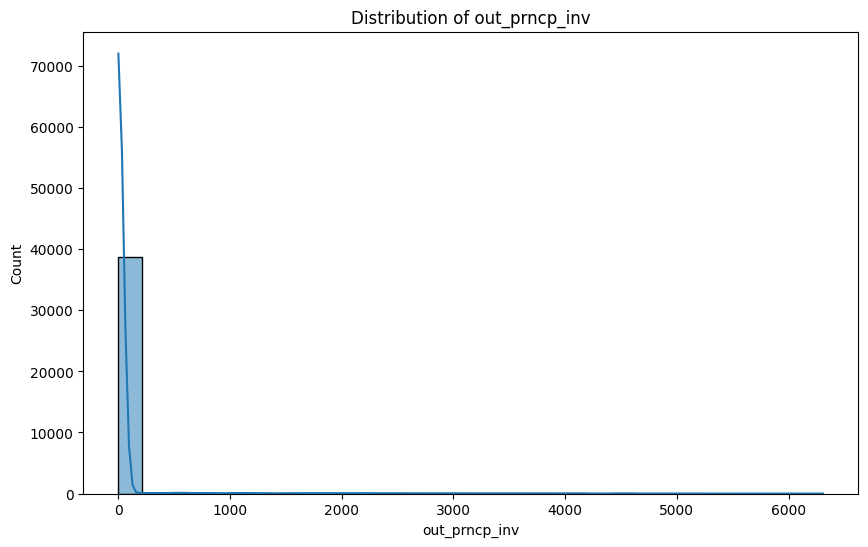

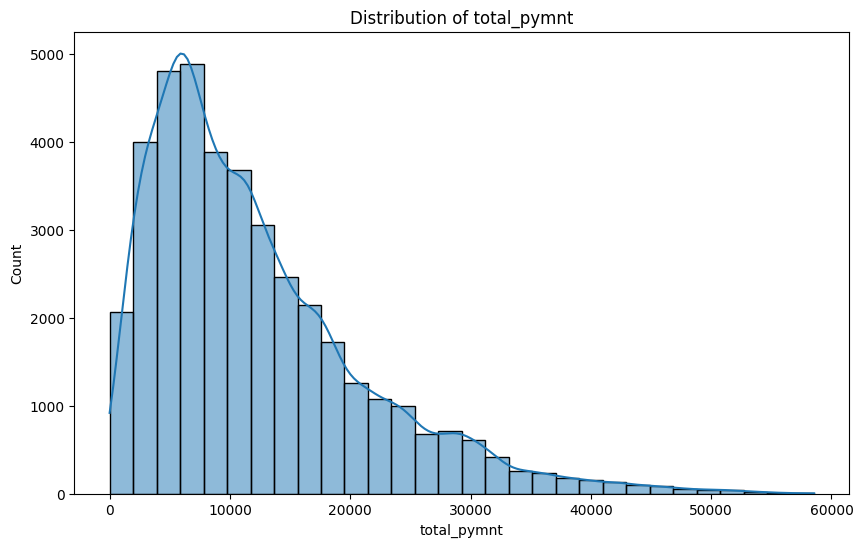

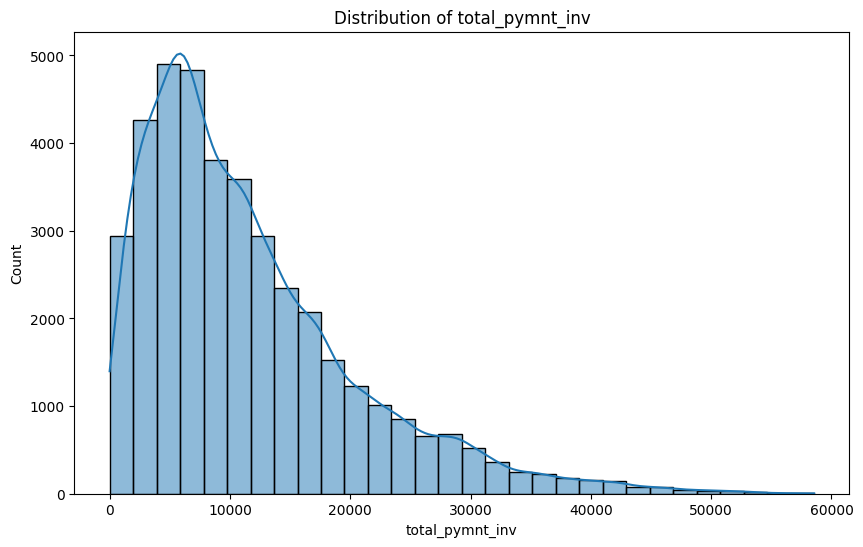

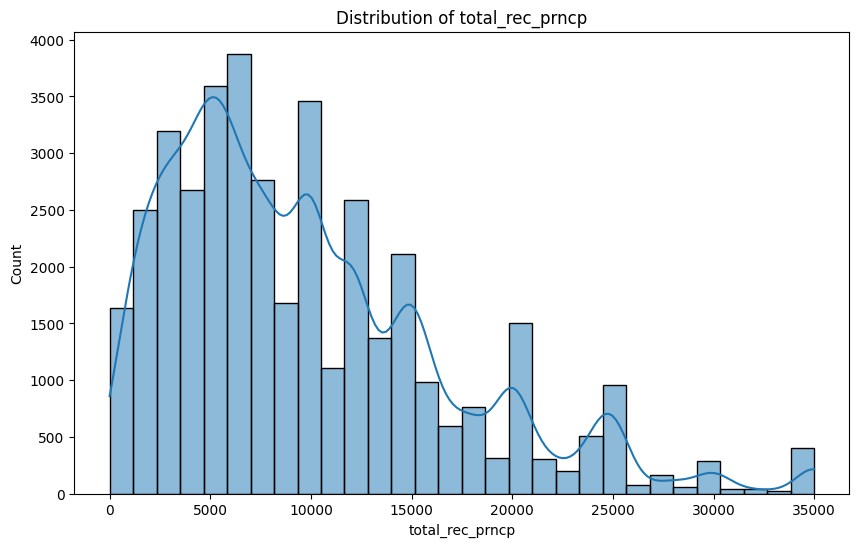

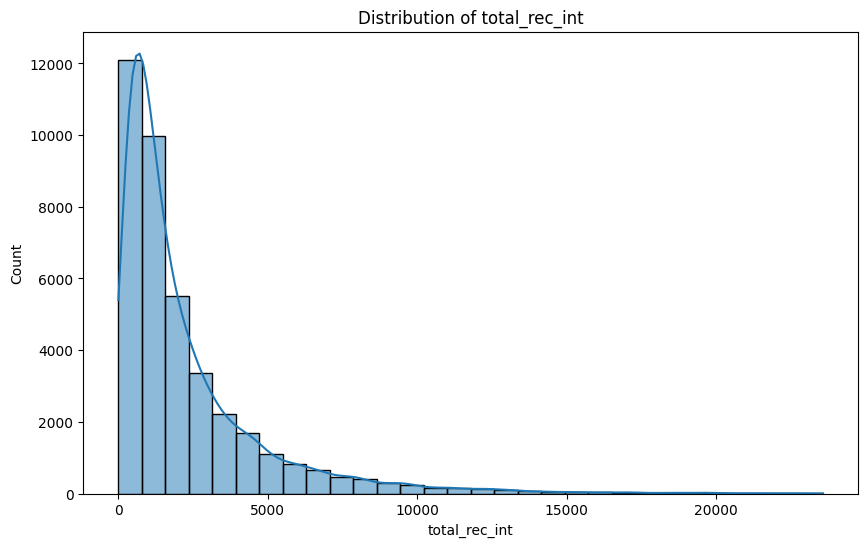

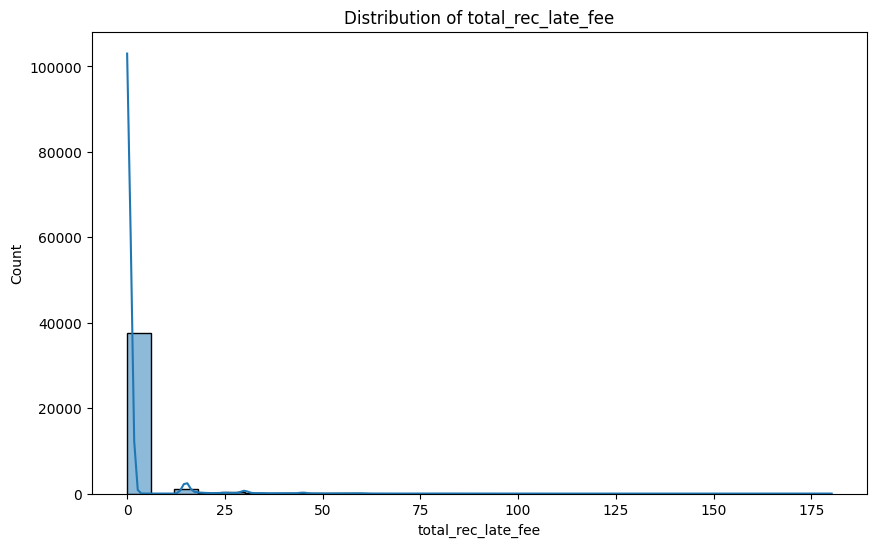

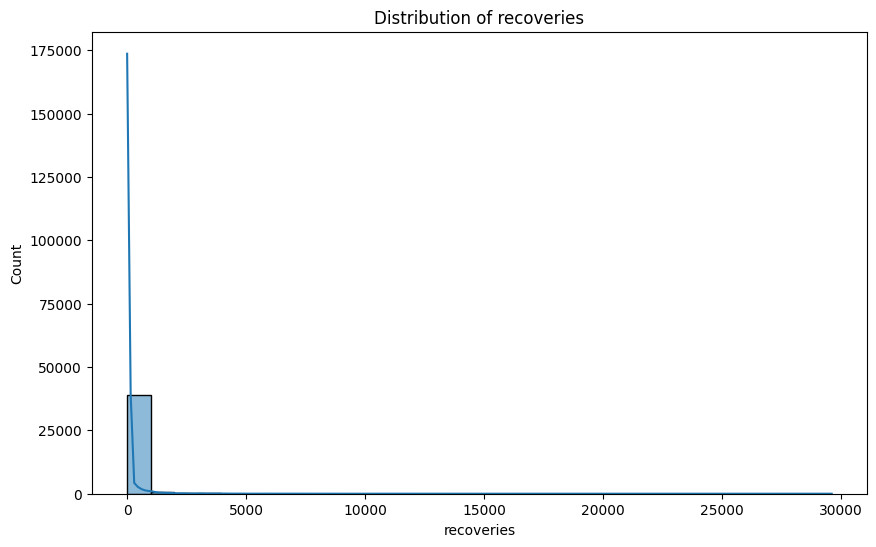

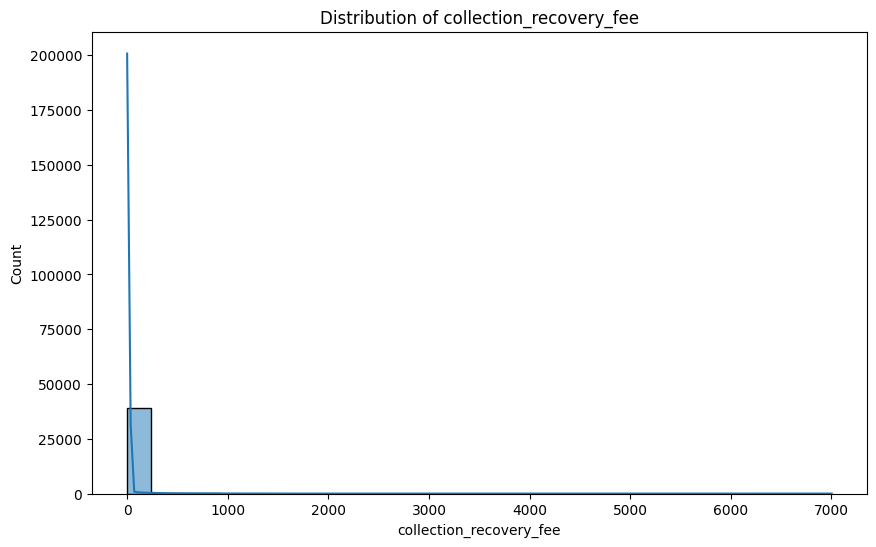

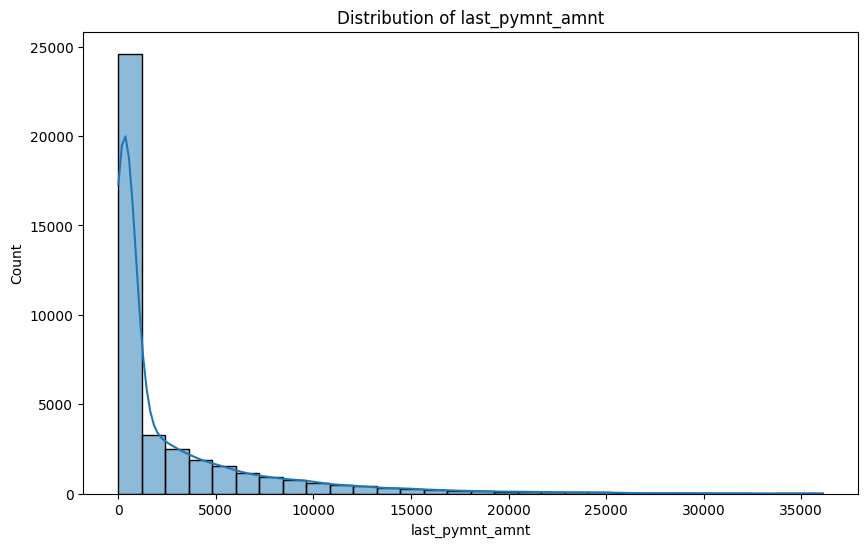

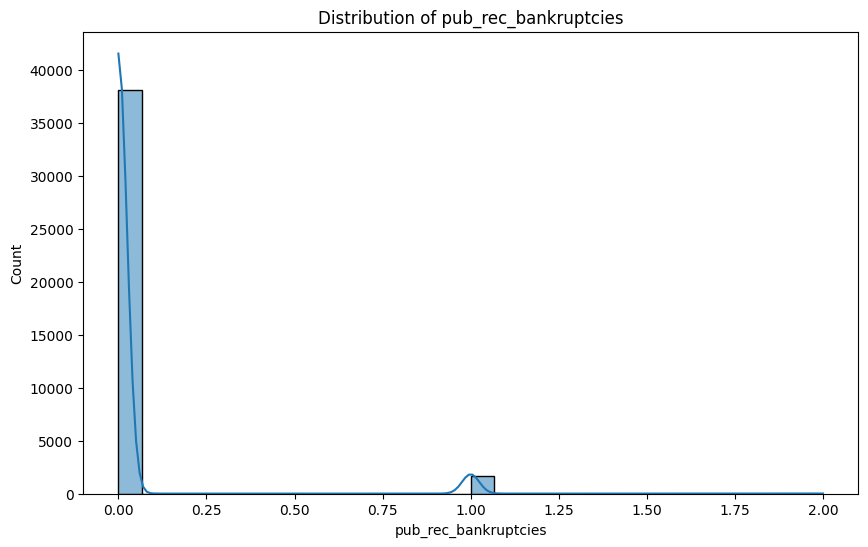

In [133]:
# Univariate Analysis for numerical columns
for col in numerical_columns_new:
    plt.figure(figsize=(10, 6))
    sns.histplot(loan_clean_new[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



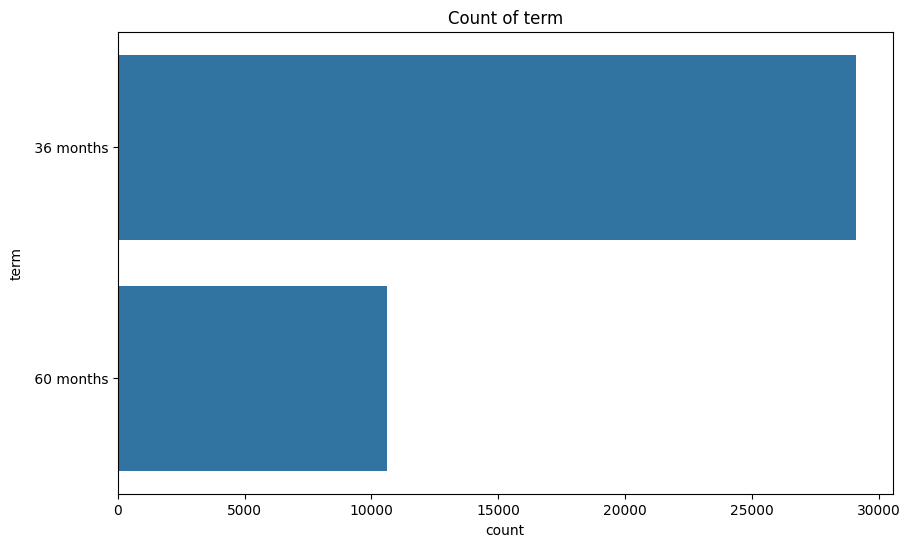

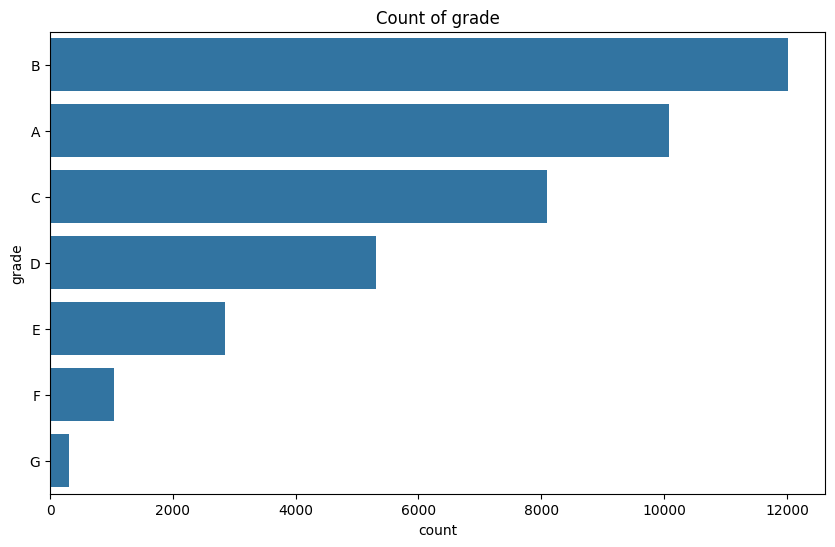

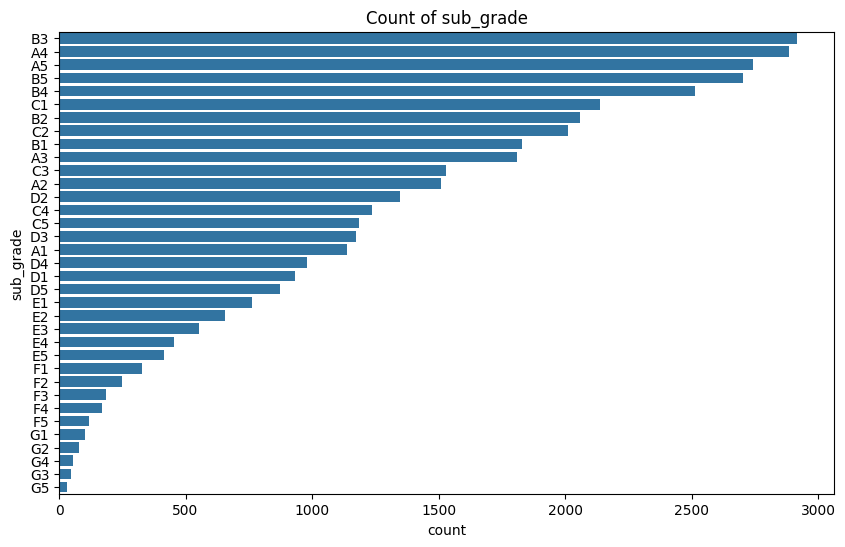

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128 (\x80) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 131 (\x83) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

In [135]:
# Univariate Analysis for categorical columns
for col in categorical_columns_new:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=loan_clean_new[col], order=loan_clean_new[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.show()

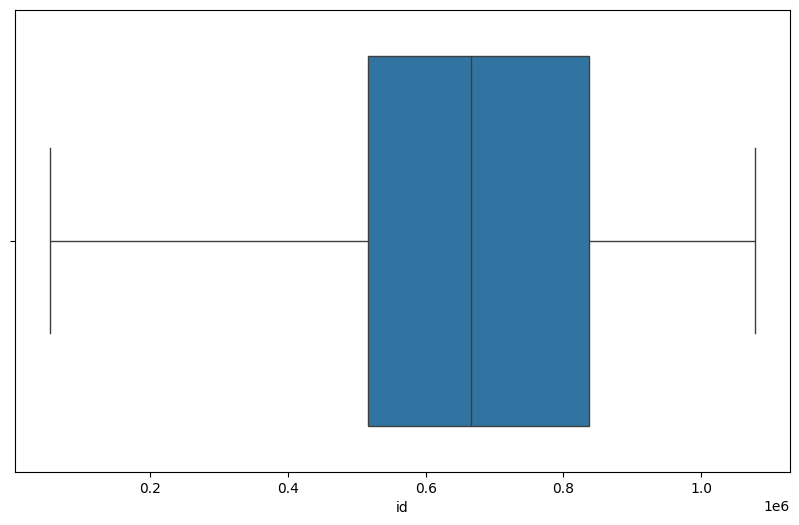

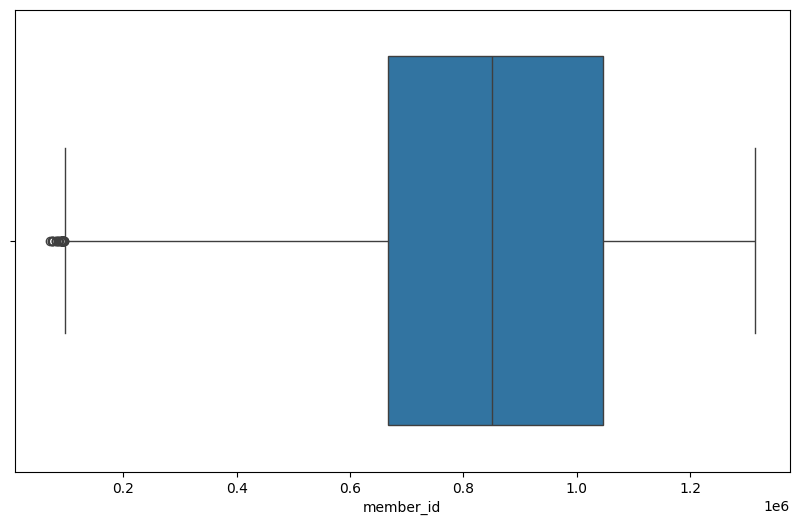

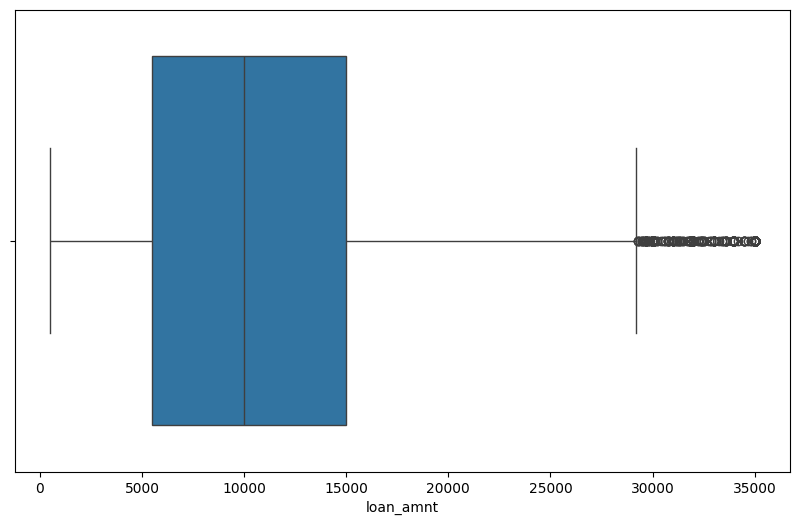

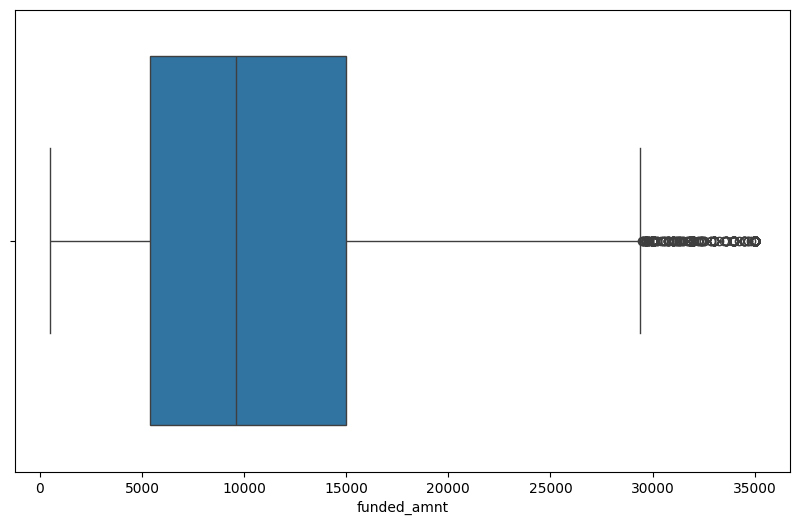

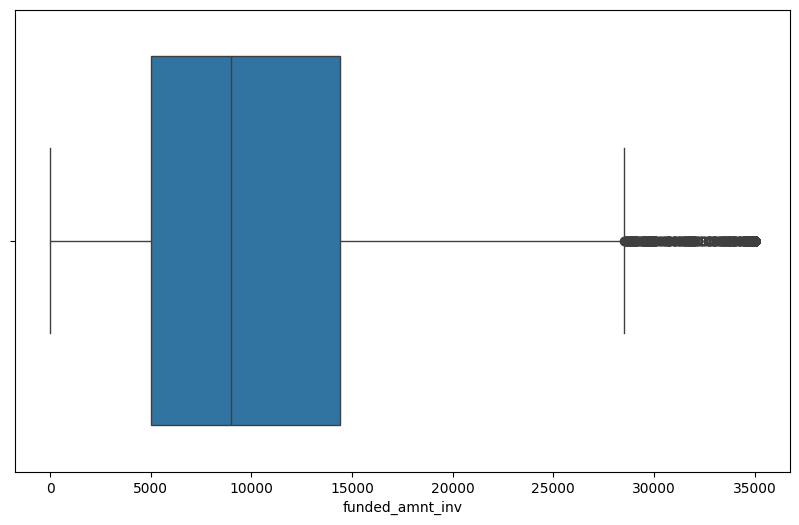

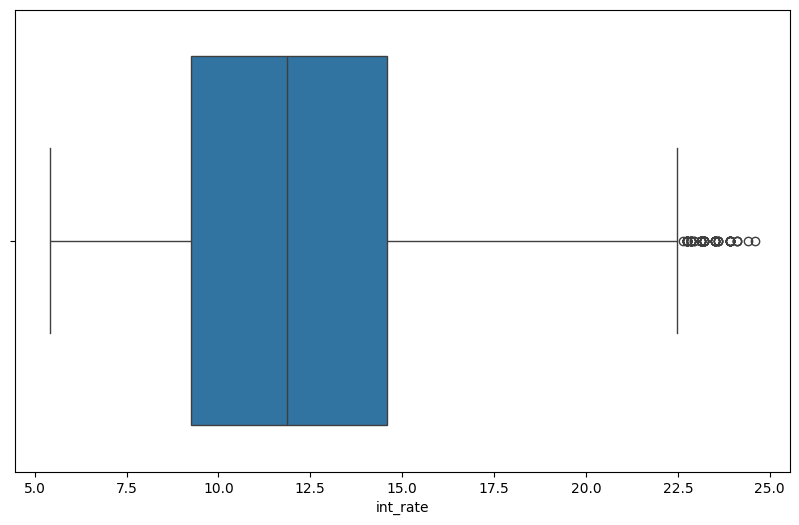

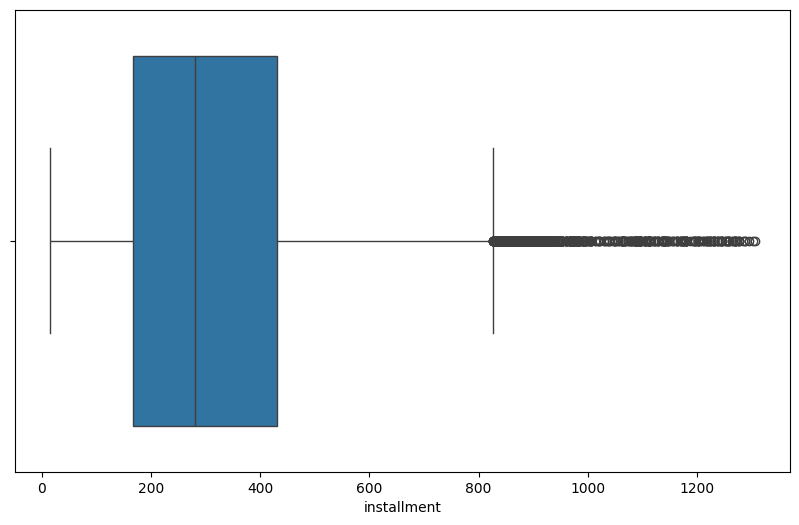

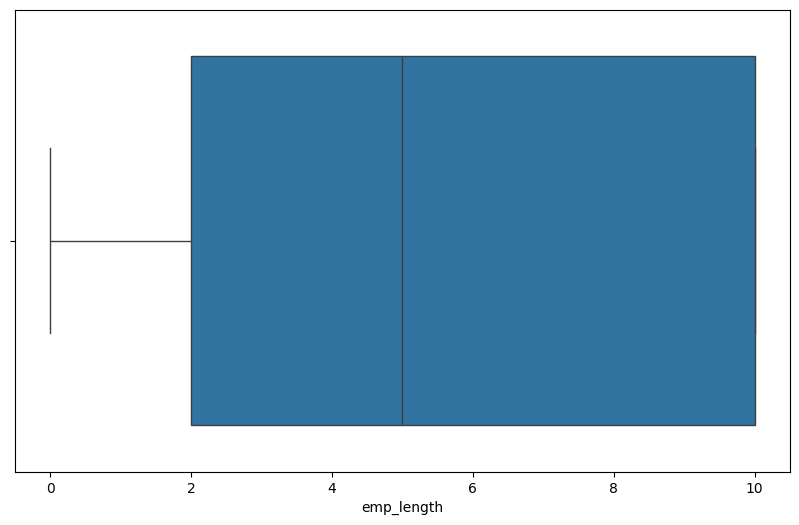

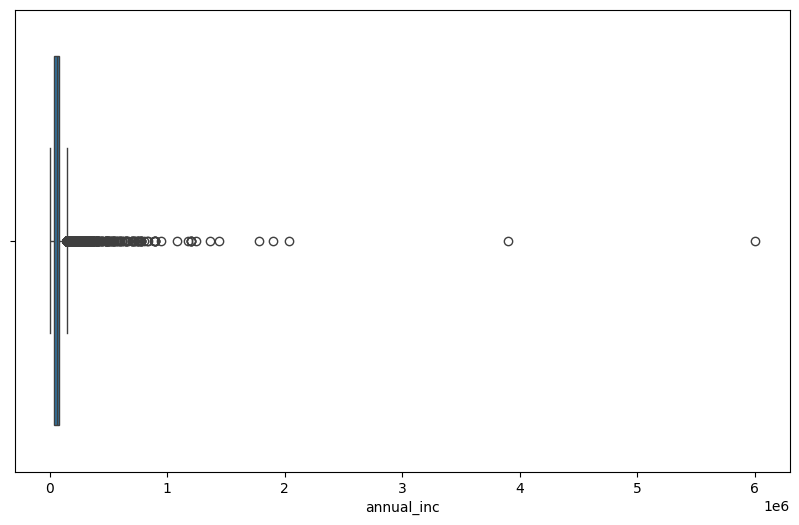

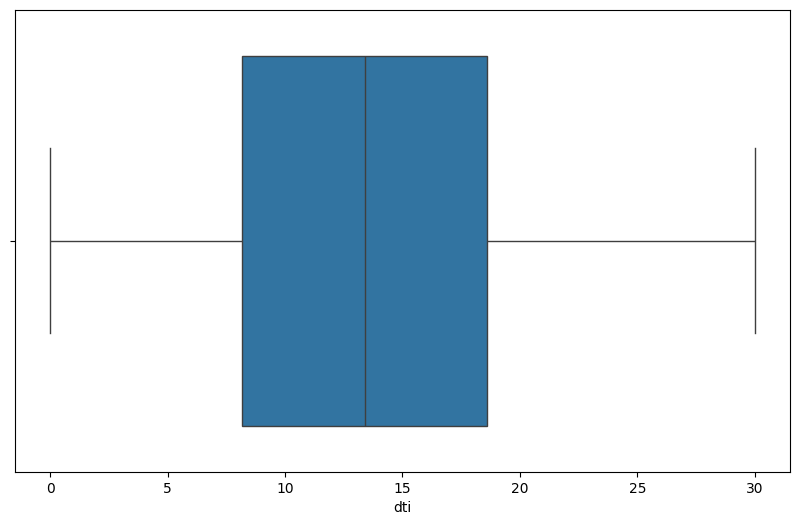

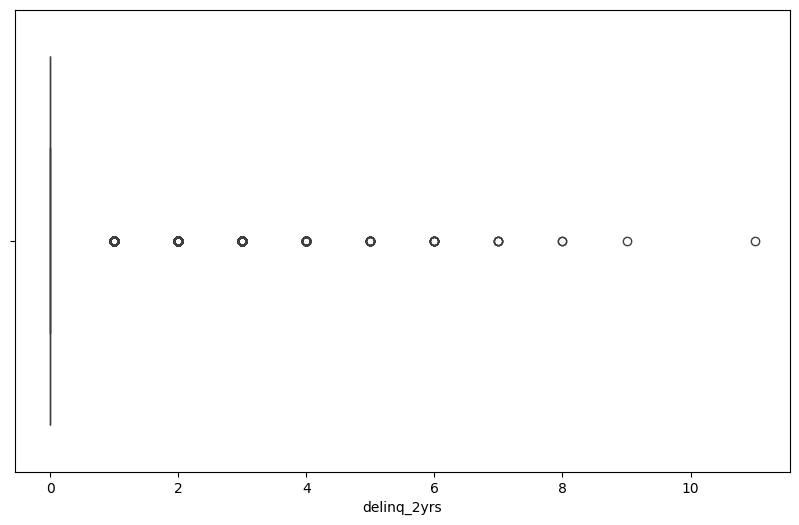

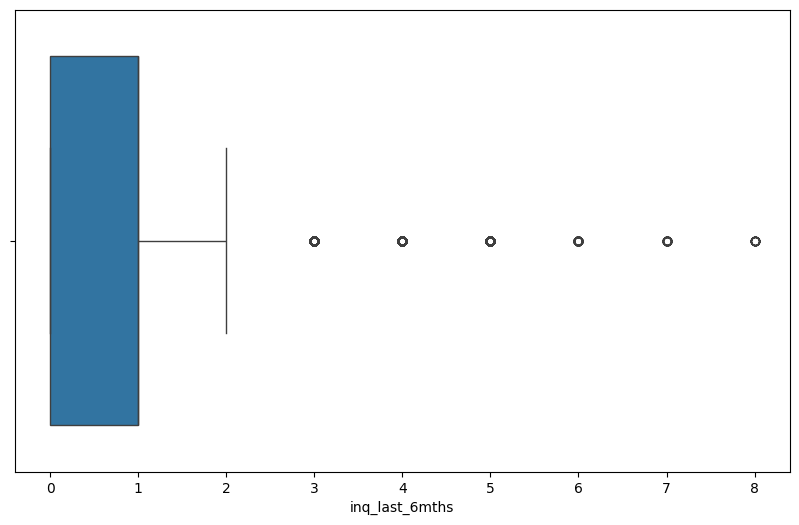

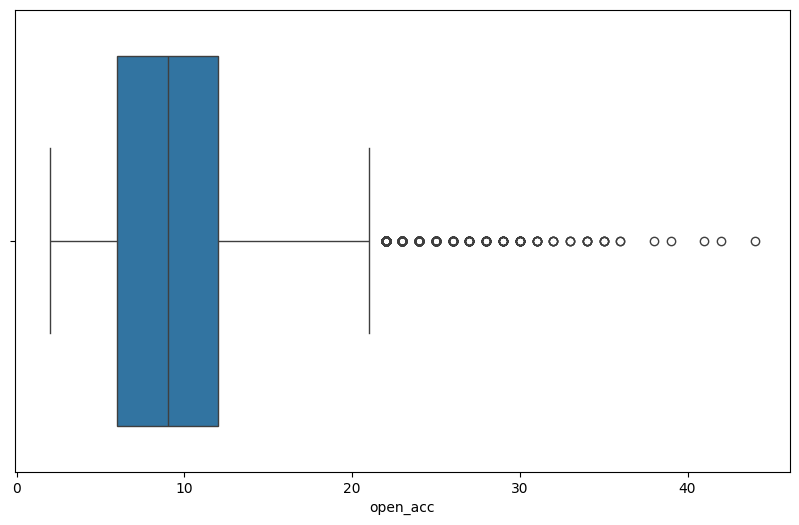

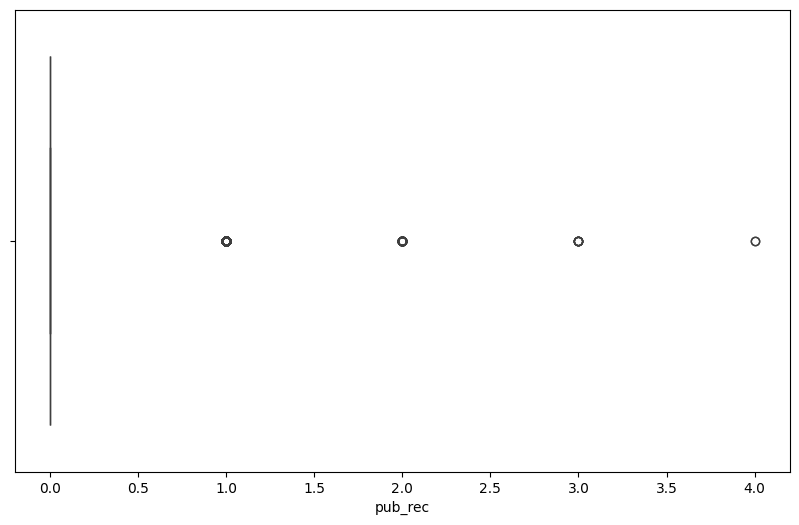

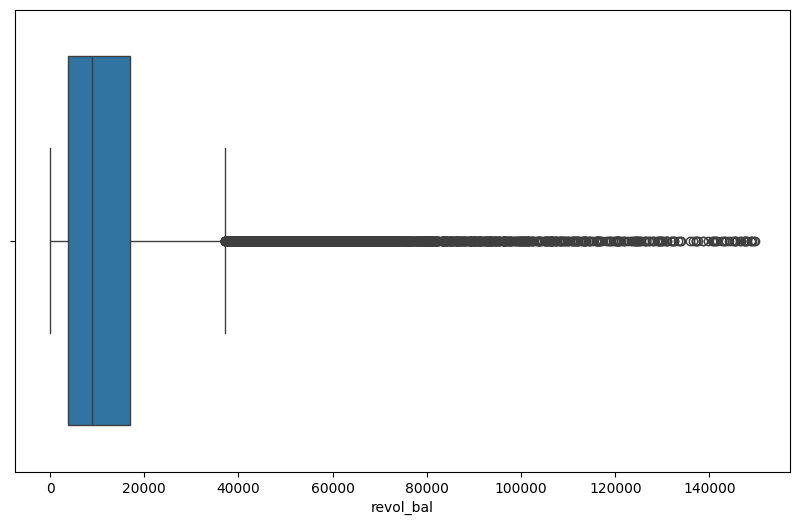

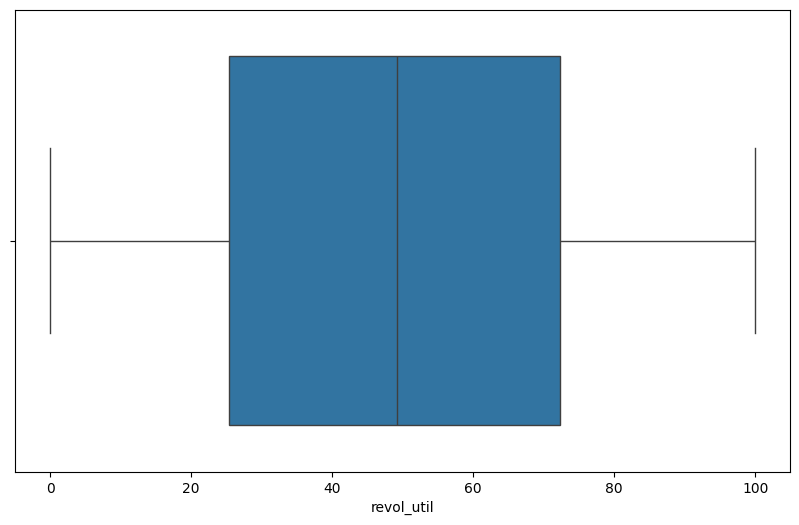

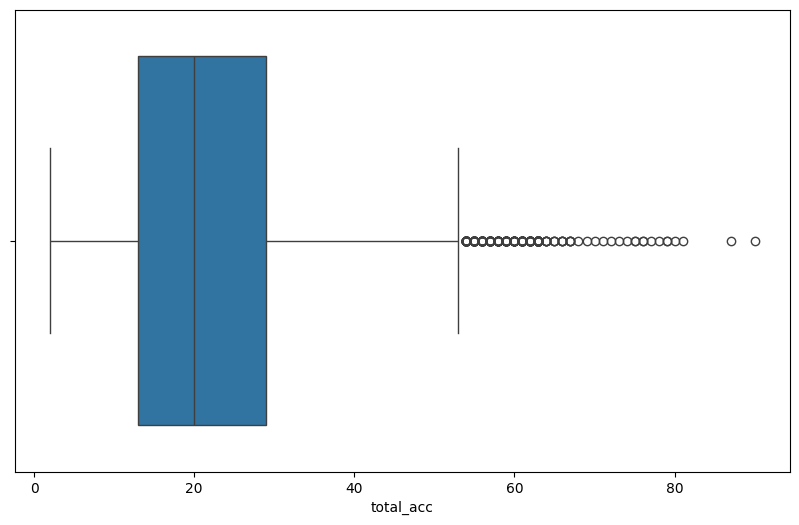

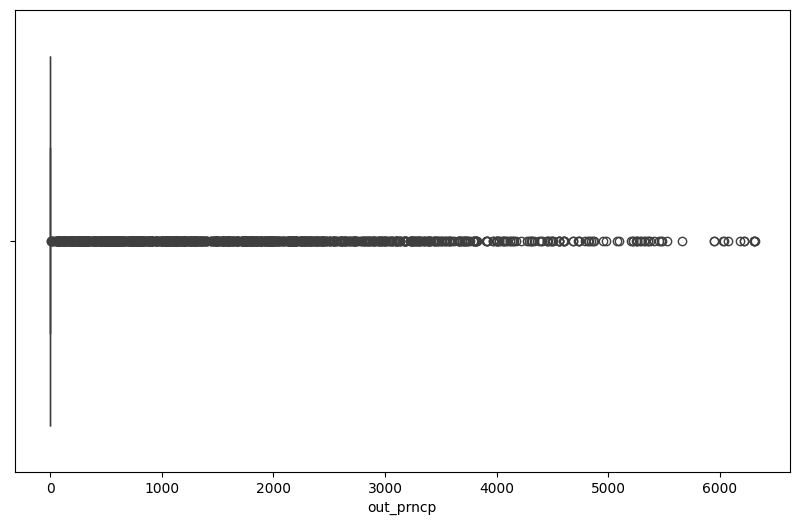

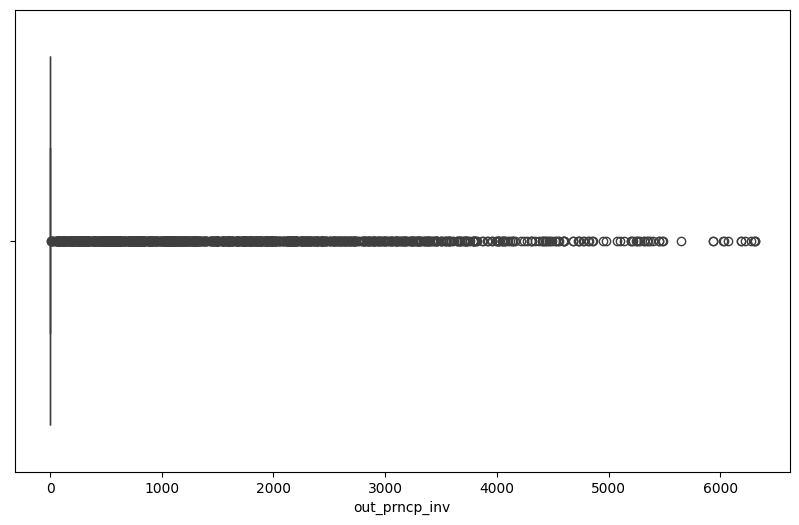

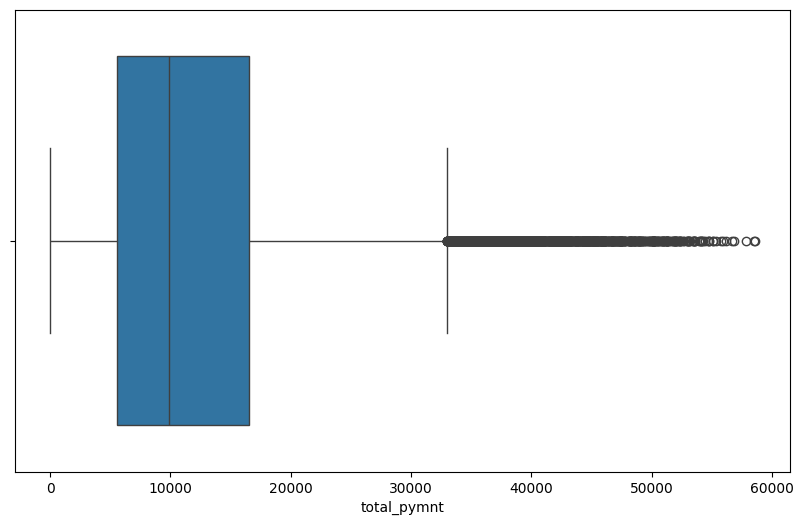

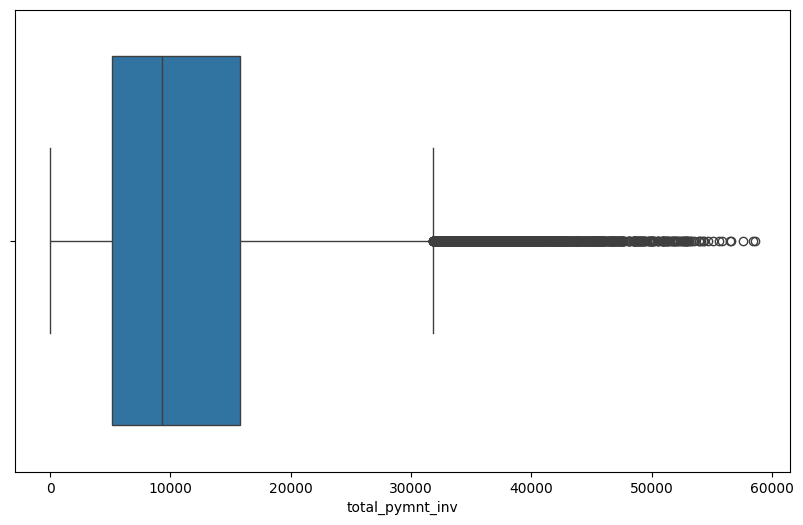

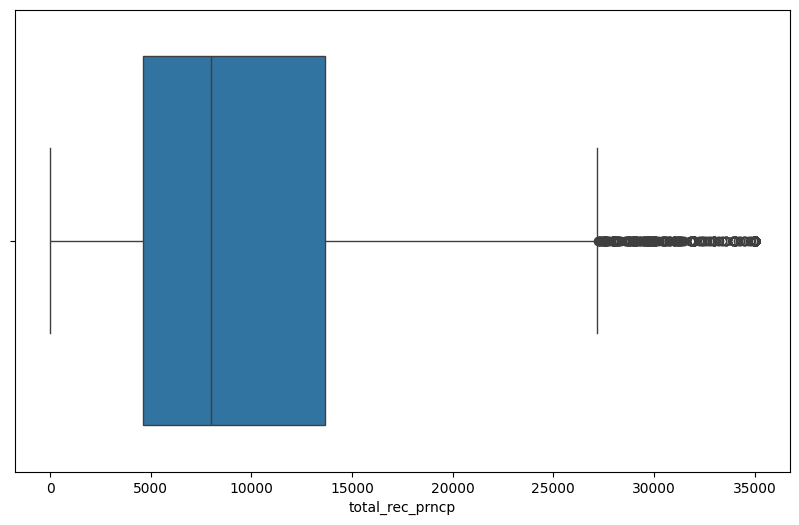

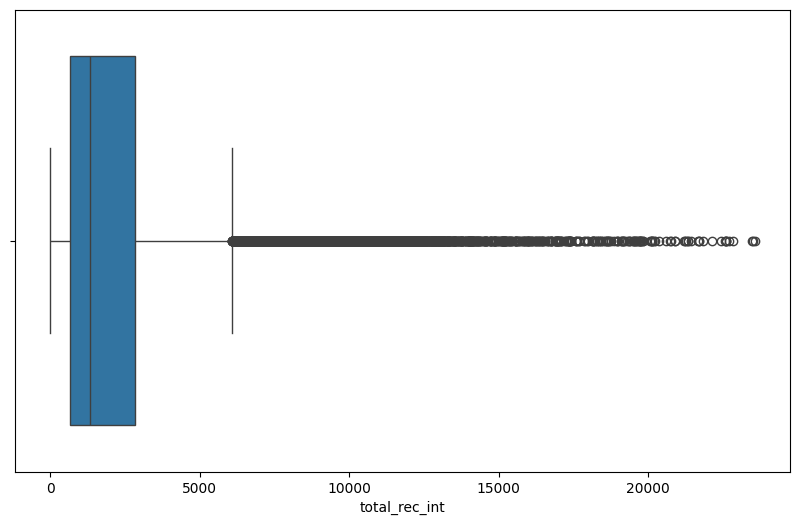

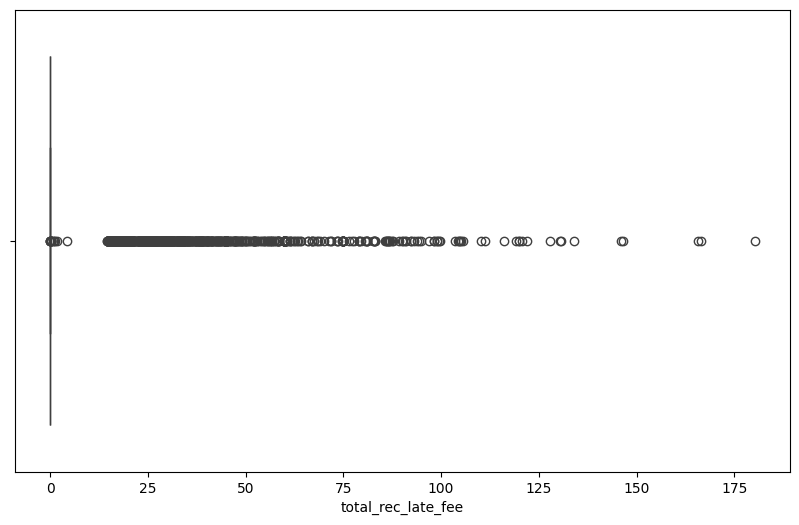

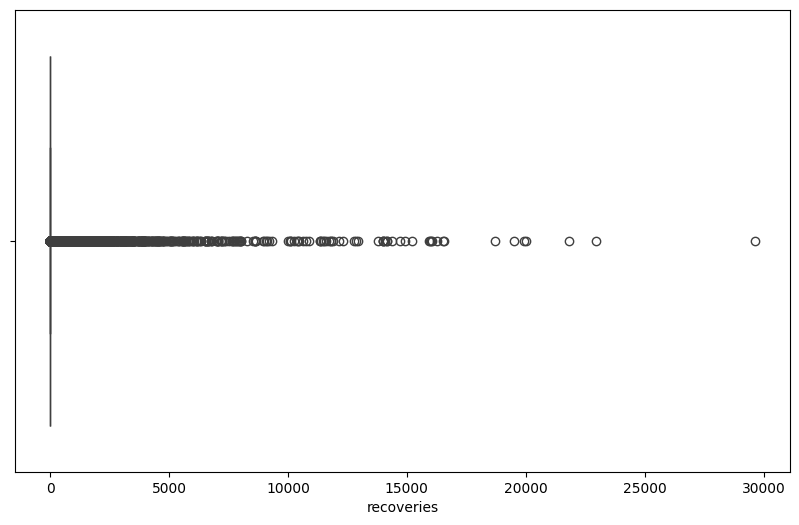

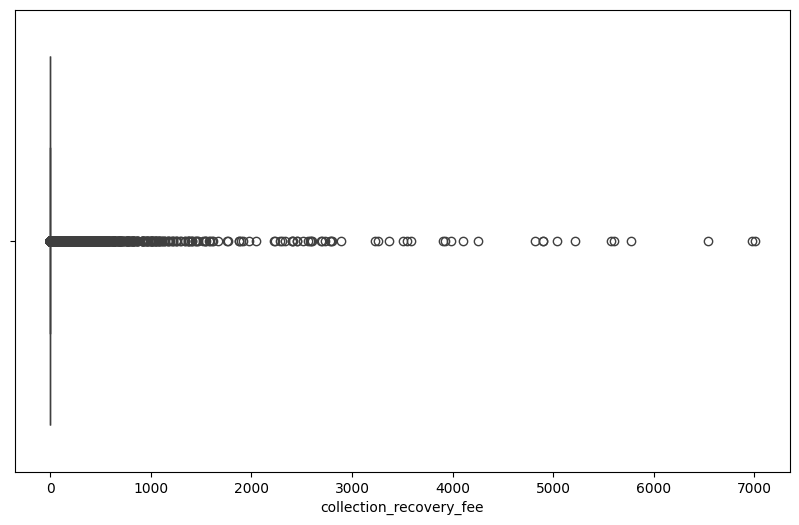

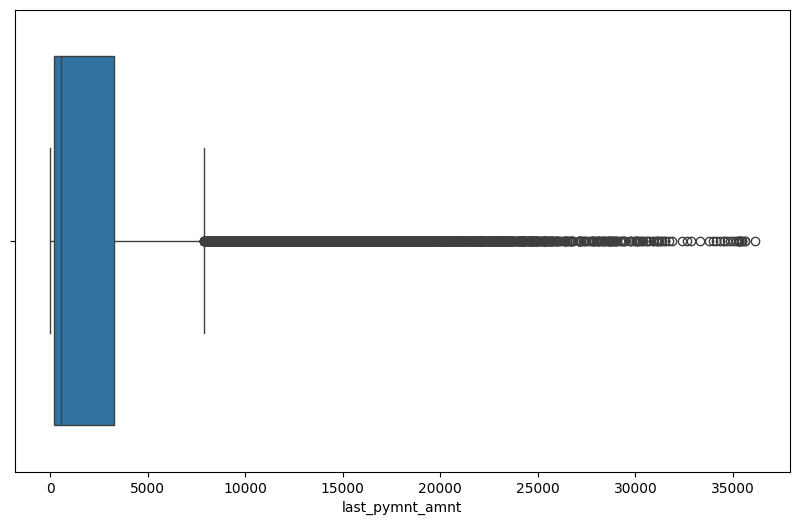

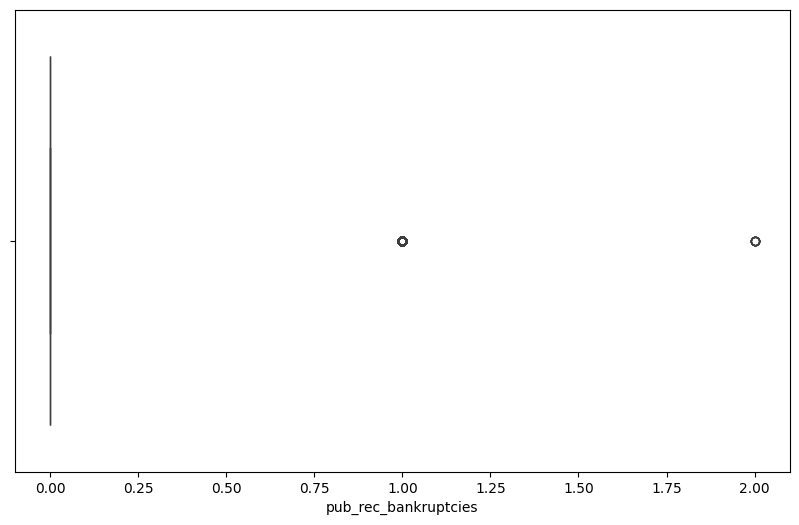

In [124]:
for i in numerical_columns_new:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=loan_clean_new[i])
    plt.show()

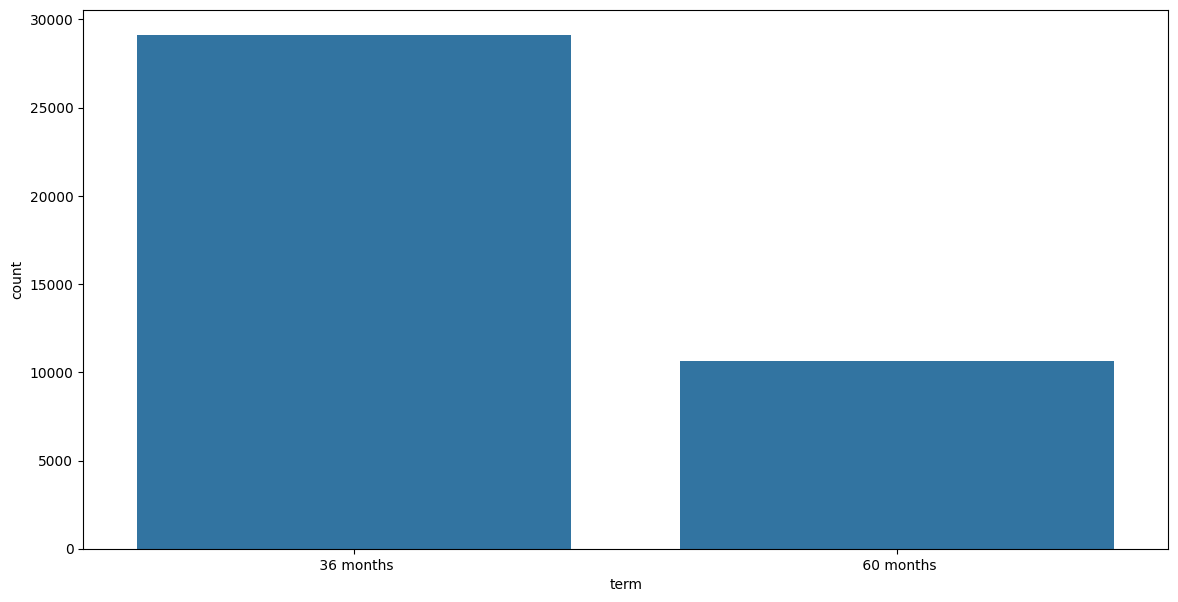

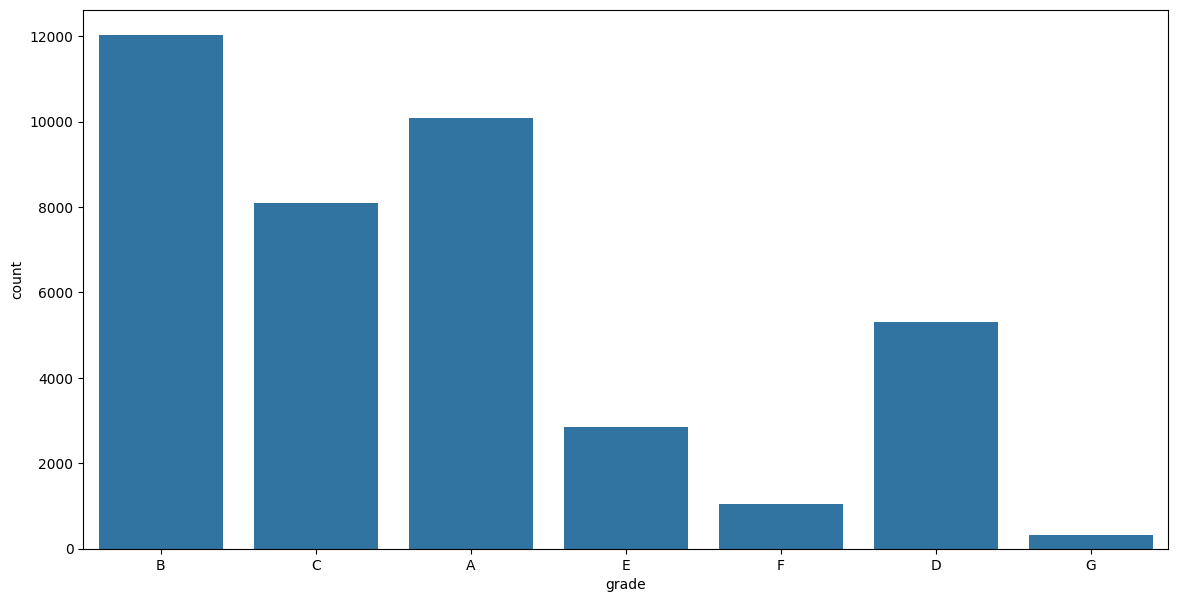

KeyboardInterrupt: 

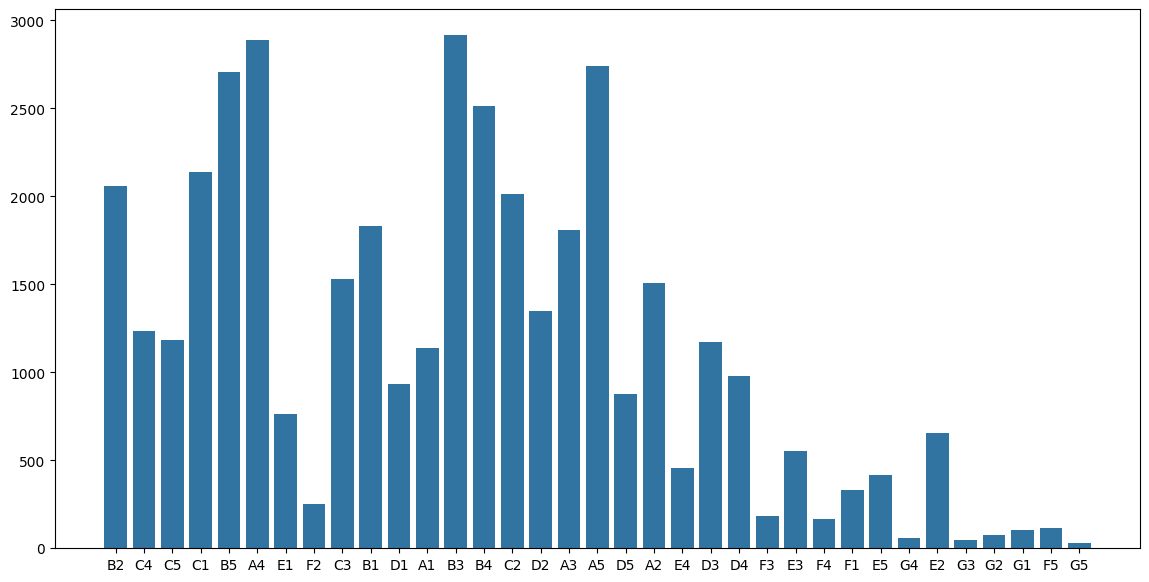

In [127]:
# Categorical analysis
for i in categorical_columns_new:
    plt.figure(figsize=(14, 7))
    sns.countplot(x=loan_clean_new[i])
    plt.show()

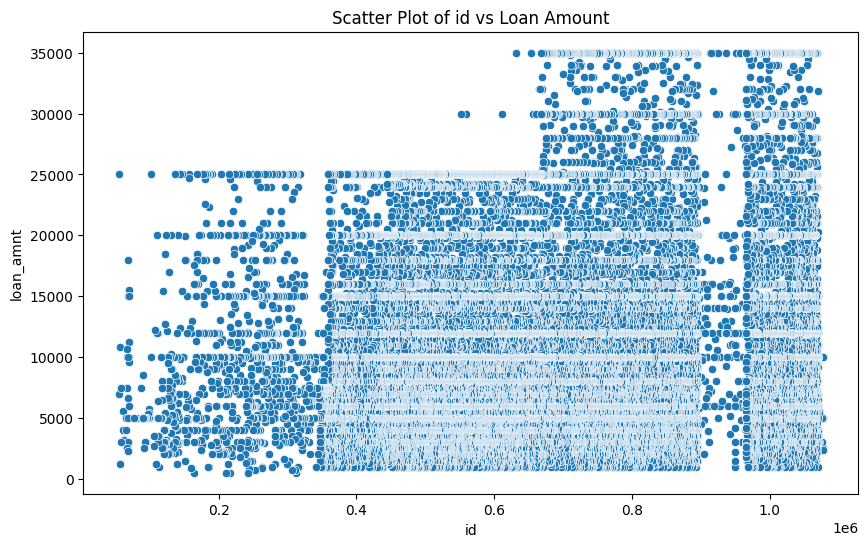

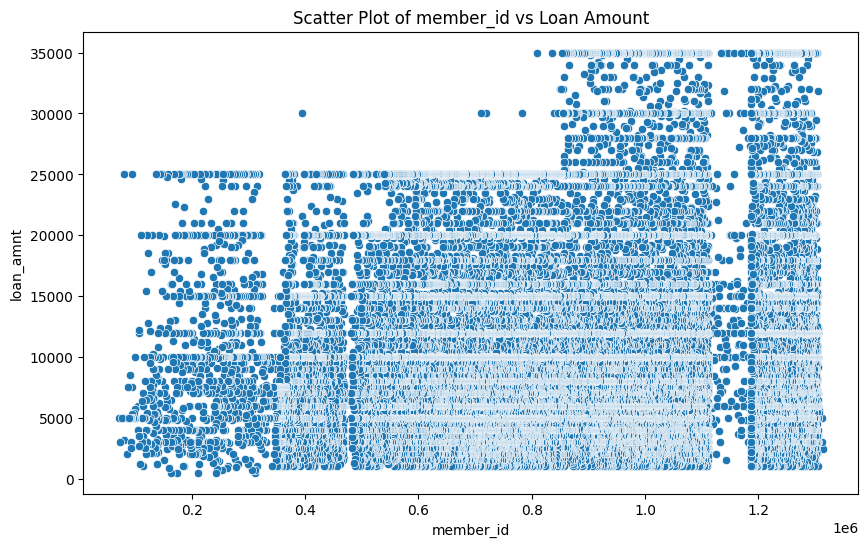

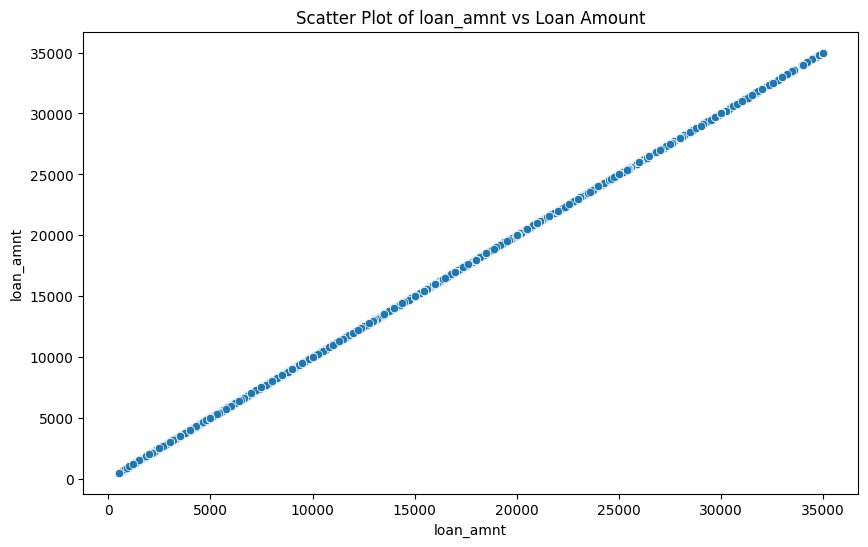

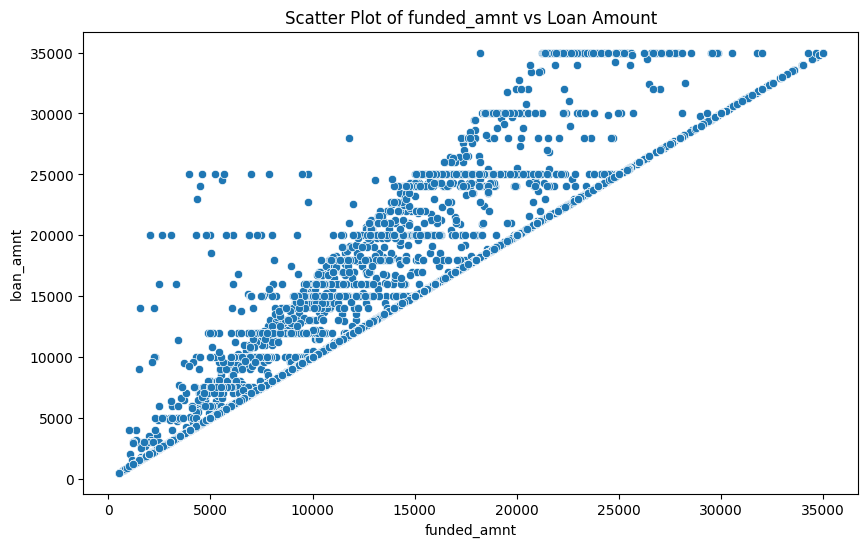

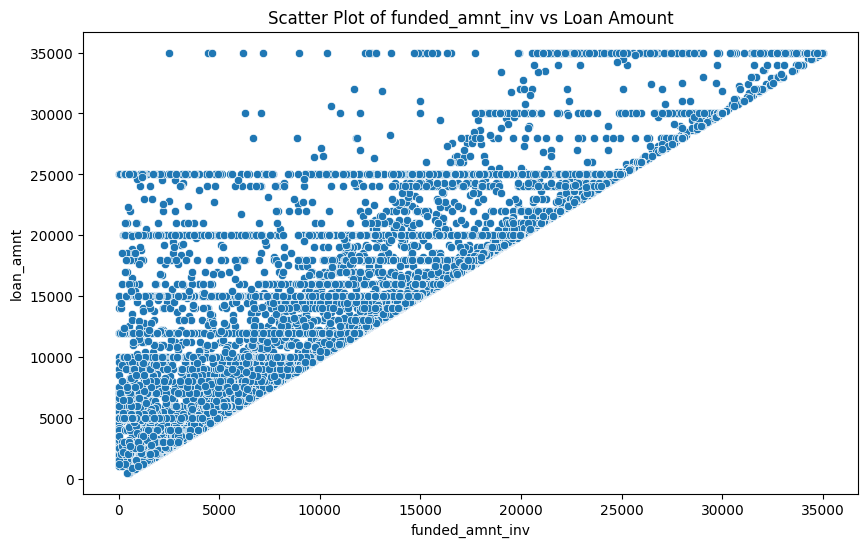

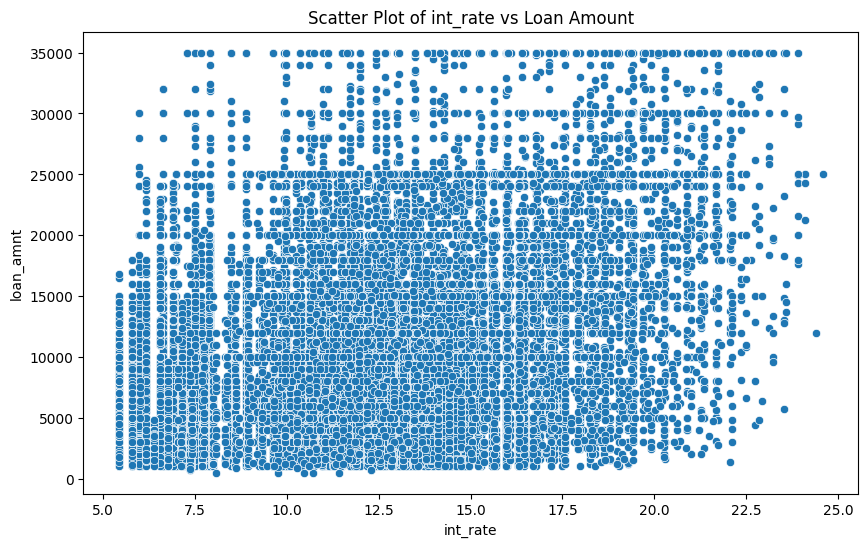

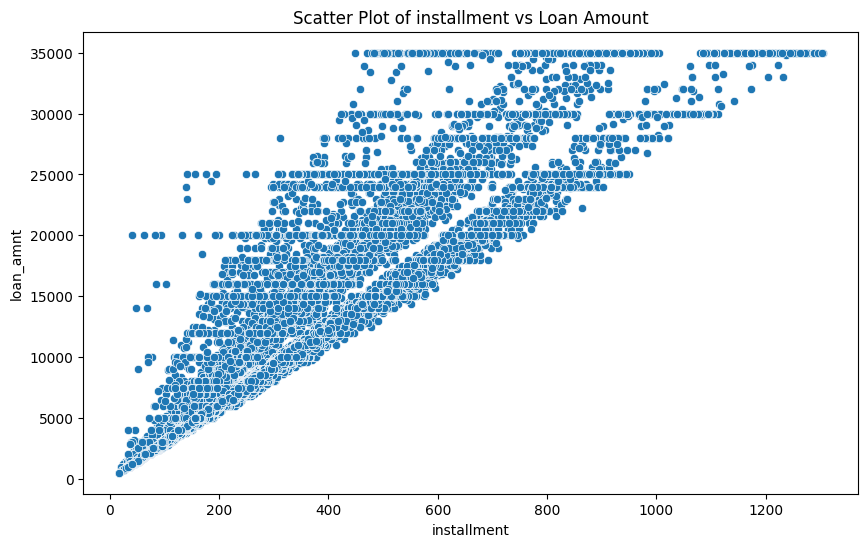

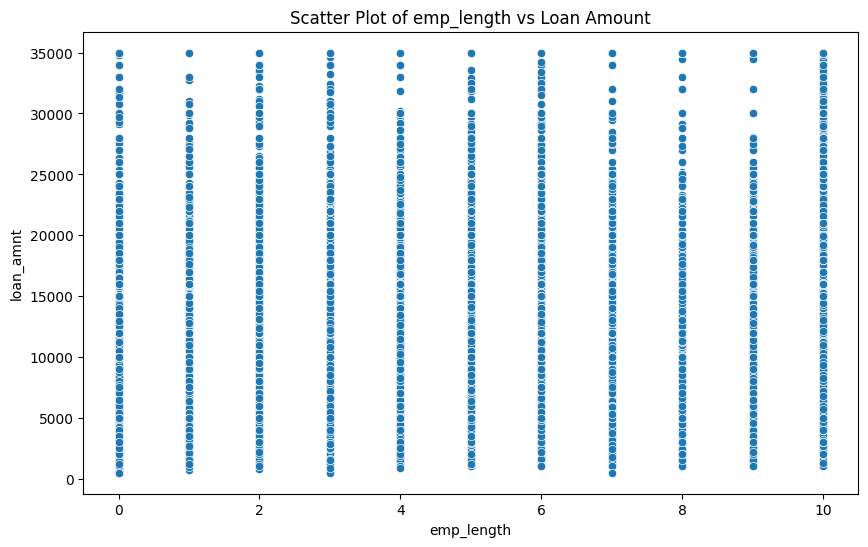

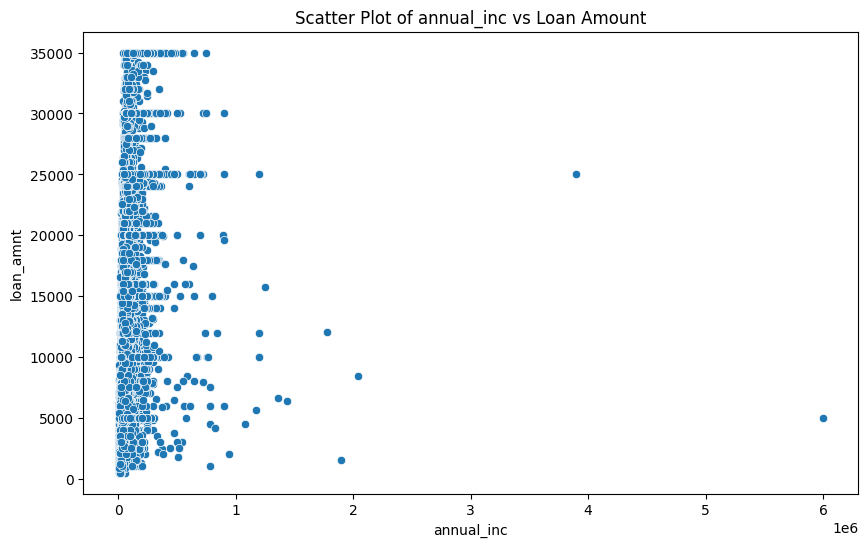

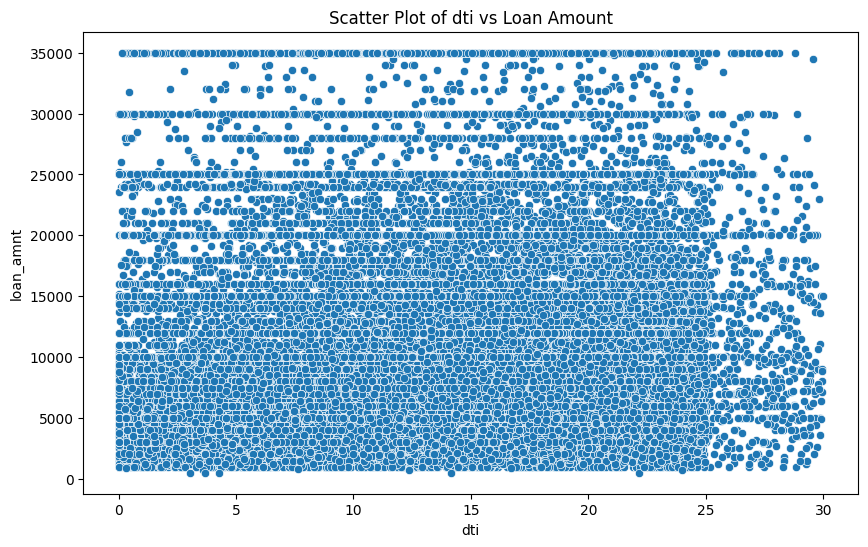

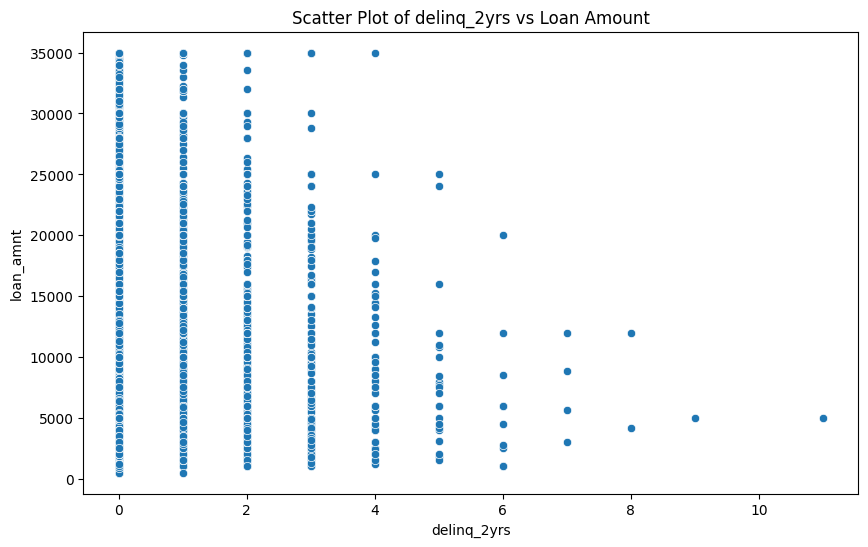

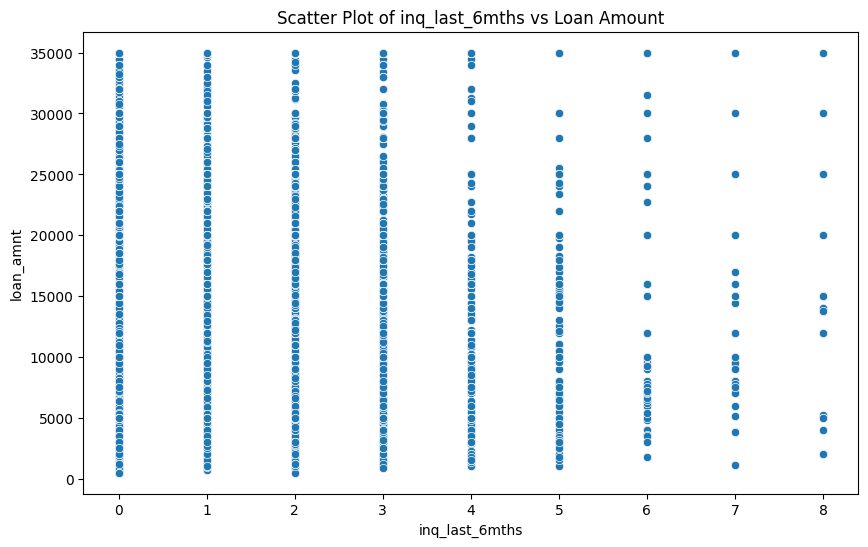

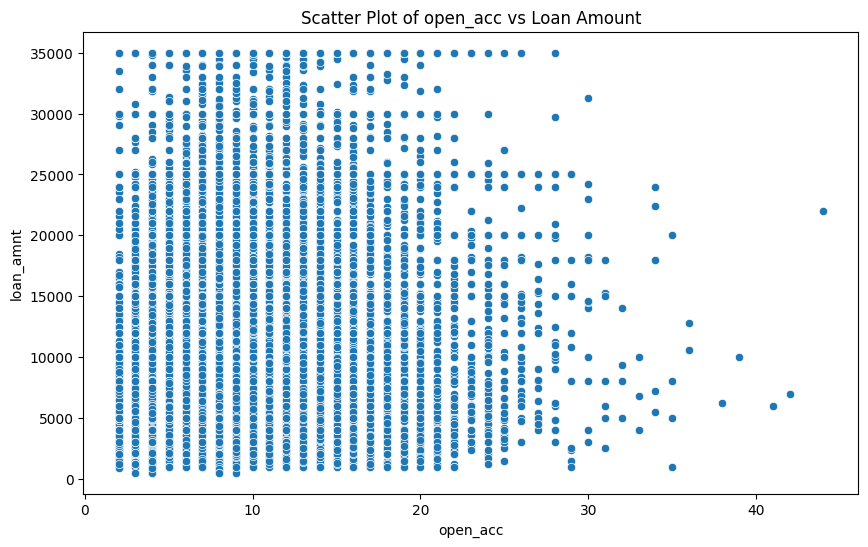

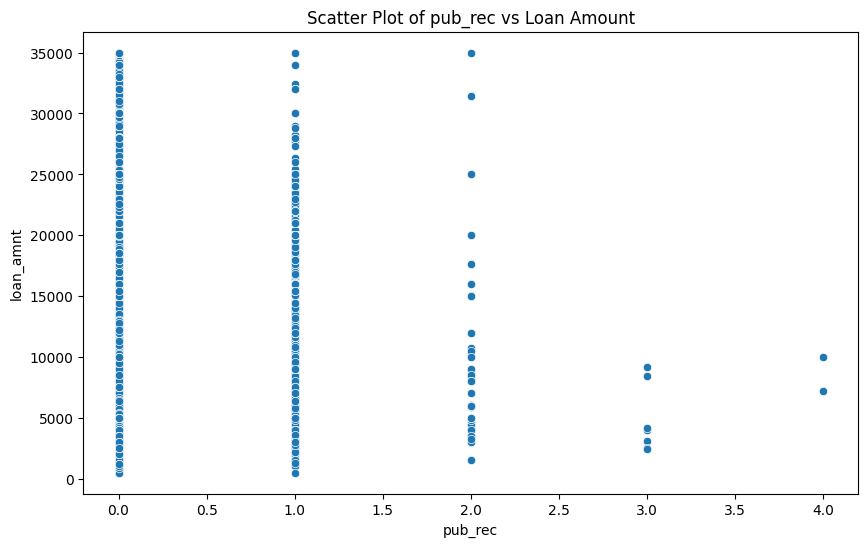

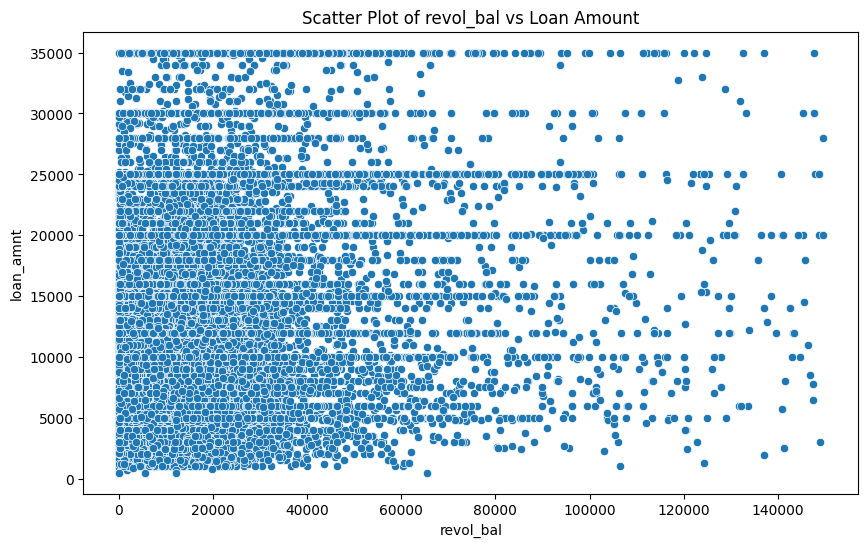

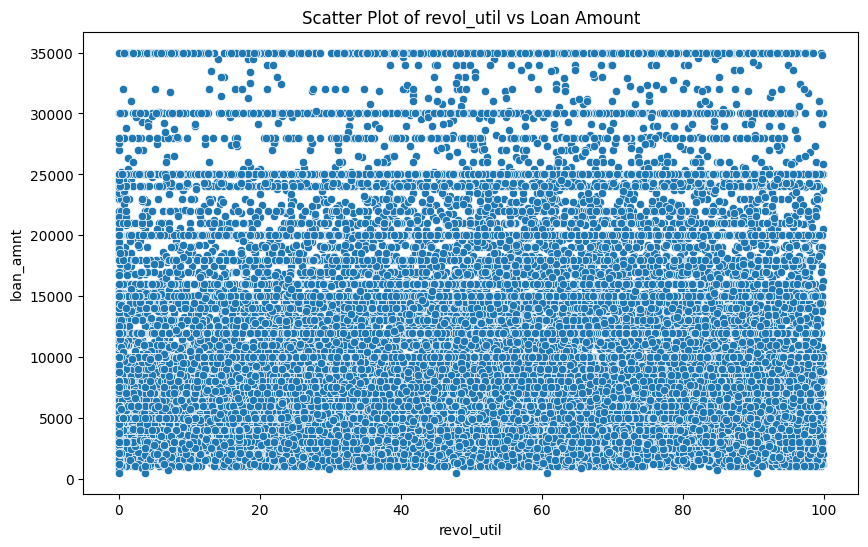

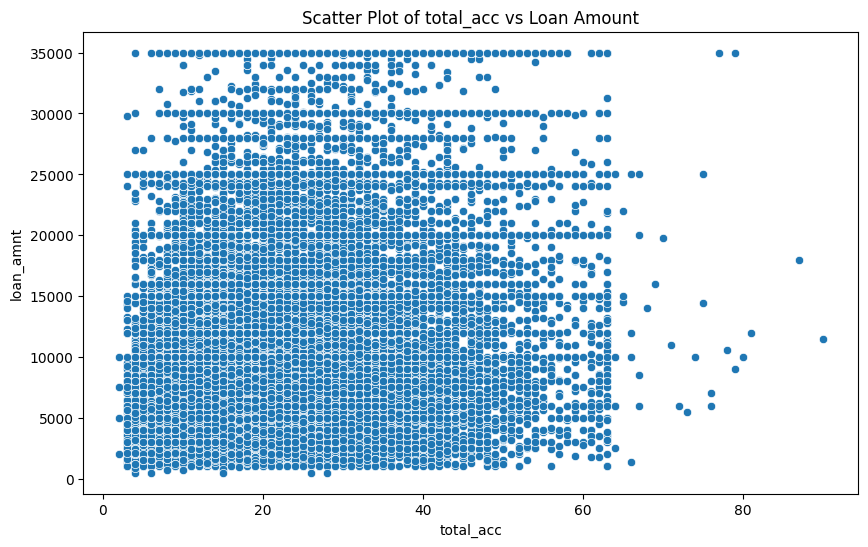

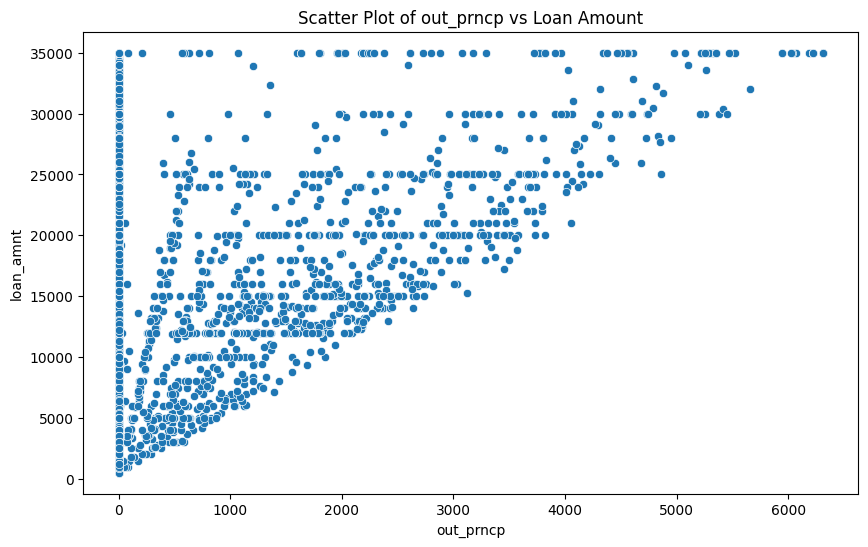

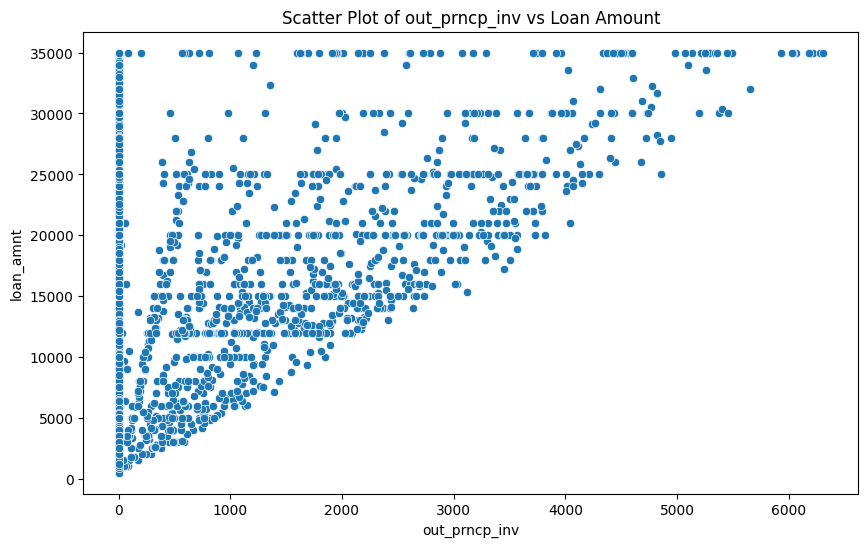

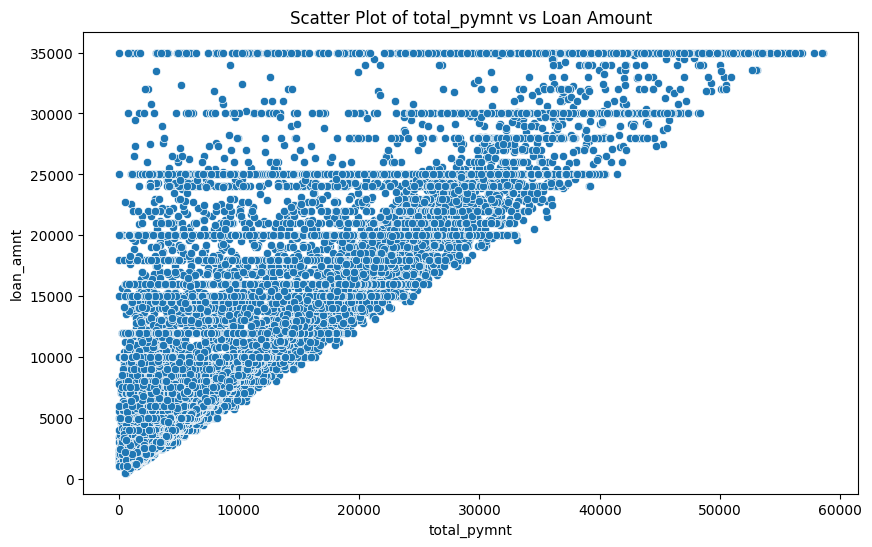

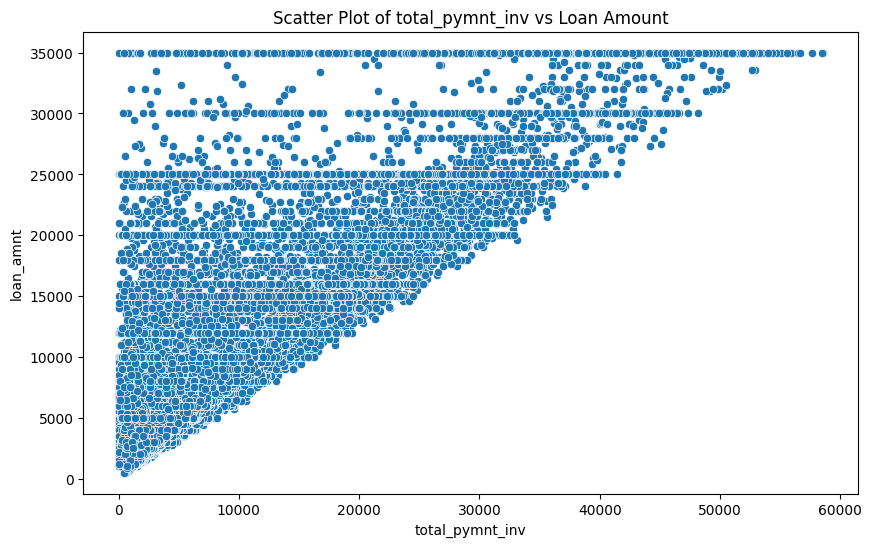

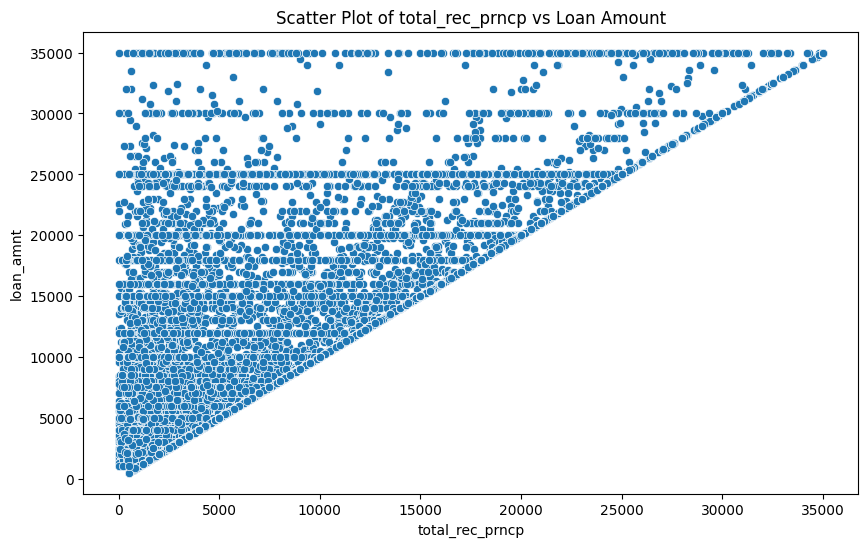

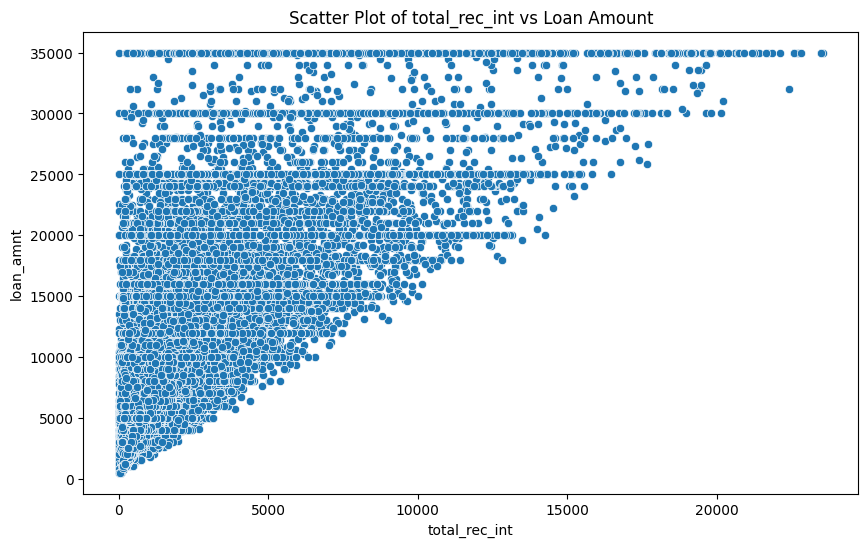

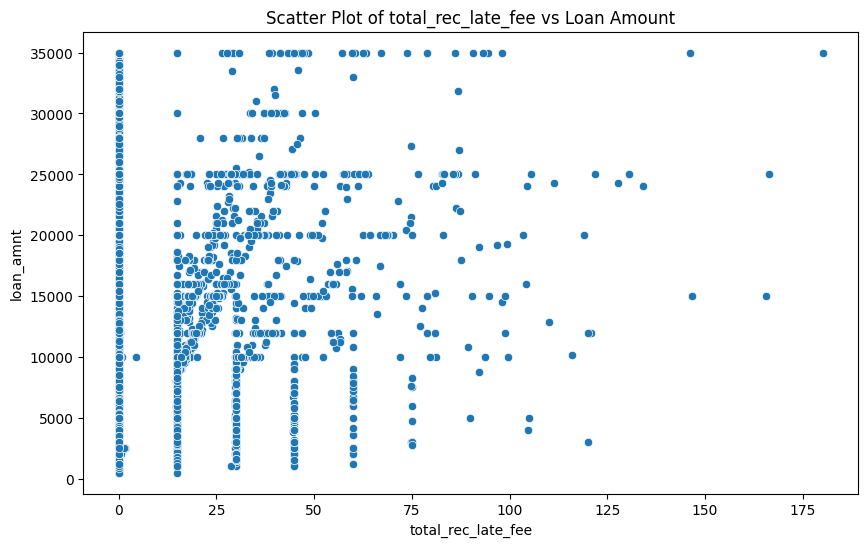

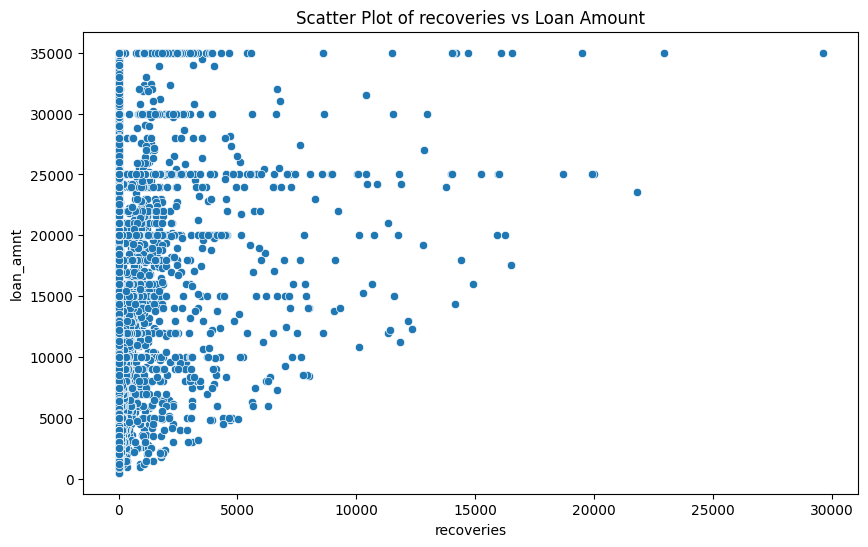

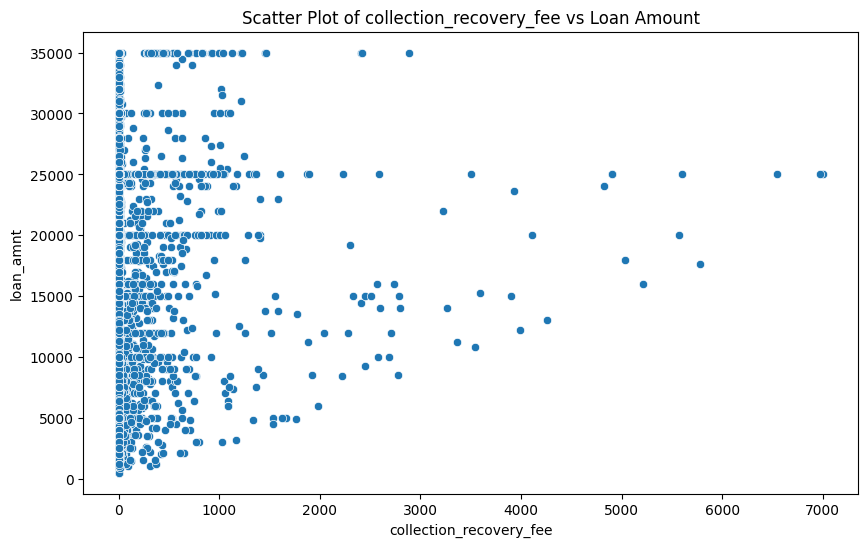

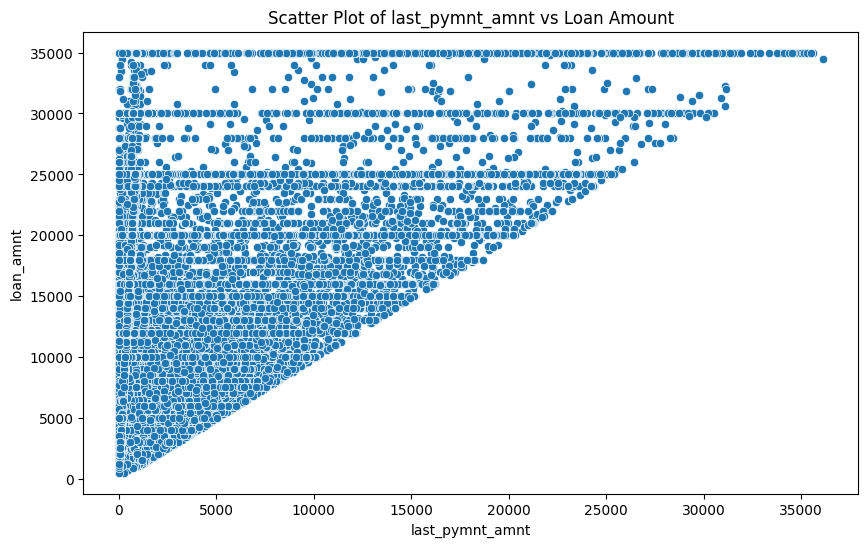

KeyboardInterrupt: 

In [142]:
#Bivariate analysis against loan amount
for i in numerical_columns_new:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=loan_clean_new[i],y=loan_clean_new["loan_amnt"])
    plt.title(f'Scatter Plot of {i} vs Loan Amount')
    plt.show()

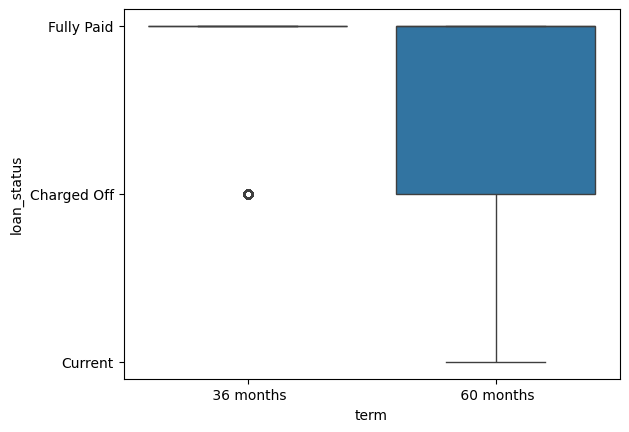

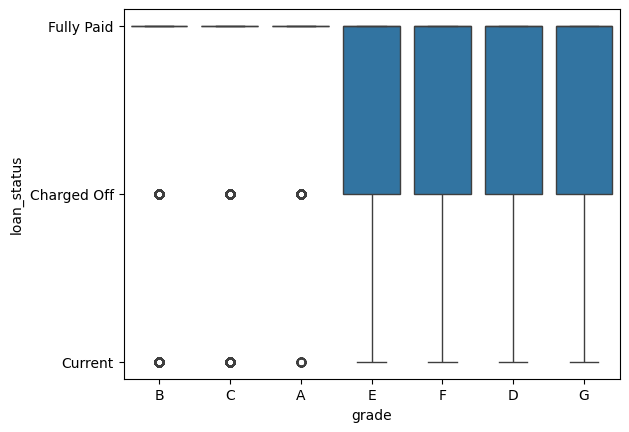

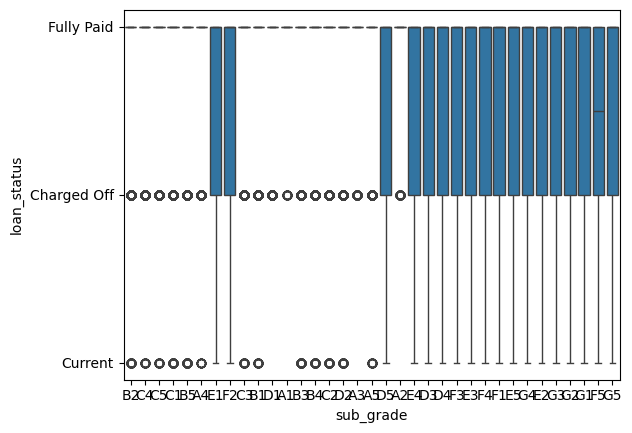

KeyboardInterrupt: 

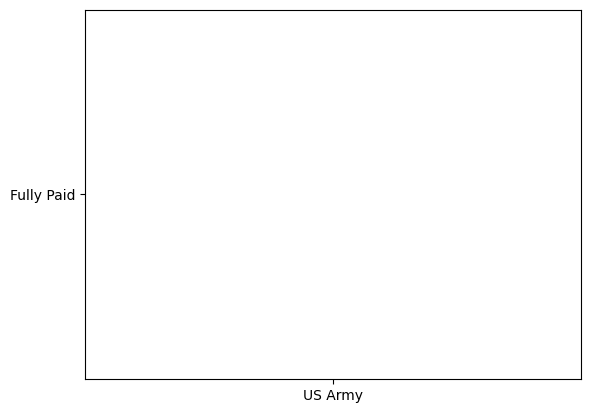

In [130]:
for i in categorical_columns_new:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=loan_clean_new[i],y=loan_clean_new["loan_status"])
    plt.show()

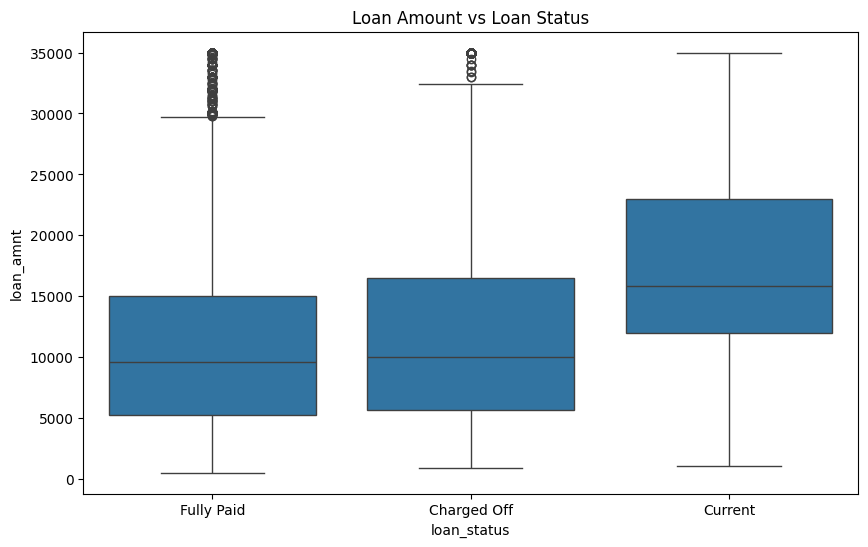

In [137]:
# Bivariate Analysis: Loan amount vs Loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=loan_clean_new)
plt.title('Loan Amount vs Loan Status')
plt.show()

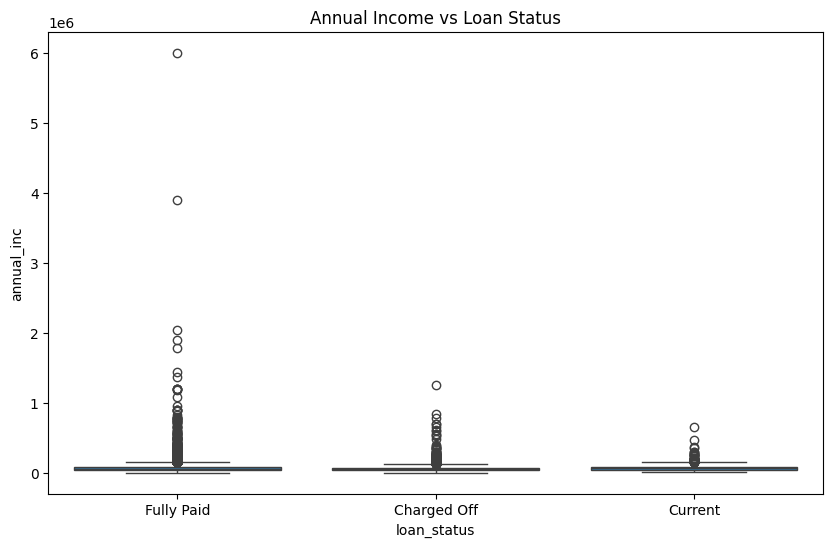

In [138]:


# Bivariate Analysis: Annual income vs Loan status
plt.figure(figsize=(10, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=loan_clean_new)
plt.title('Annual Income vs Loan Status')
plt.show()

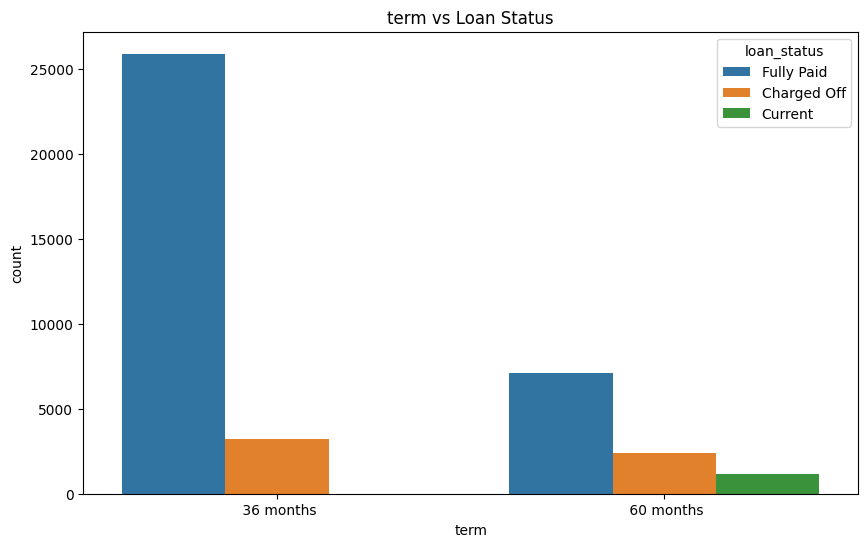

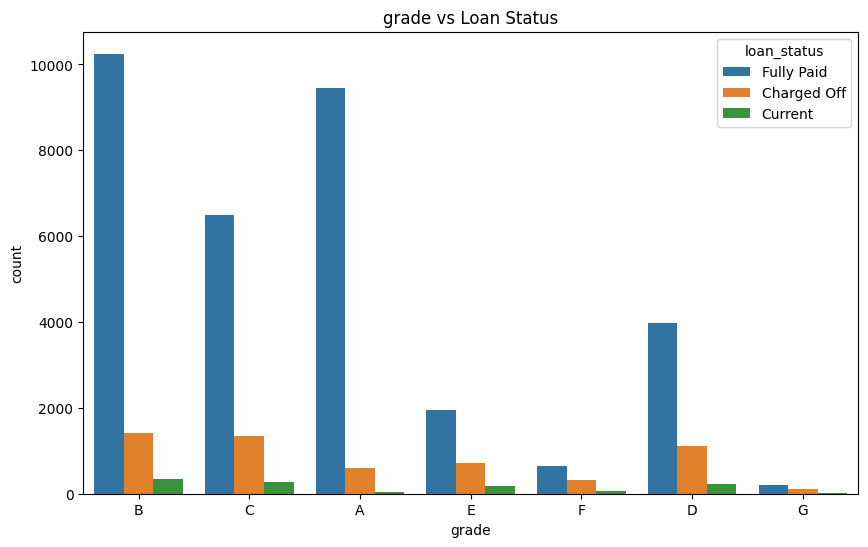

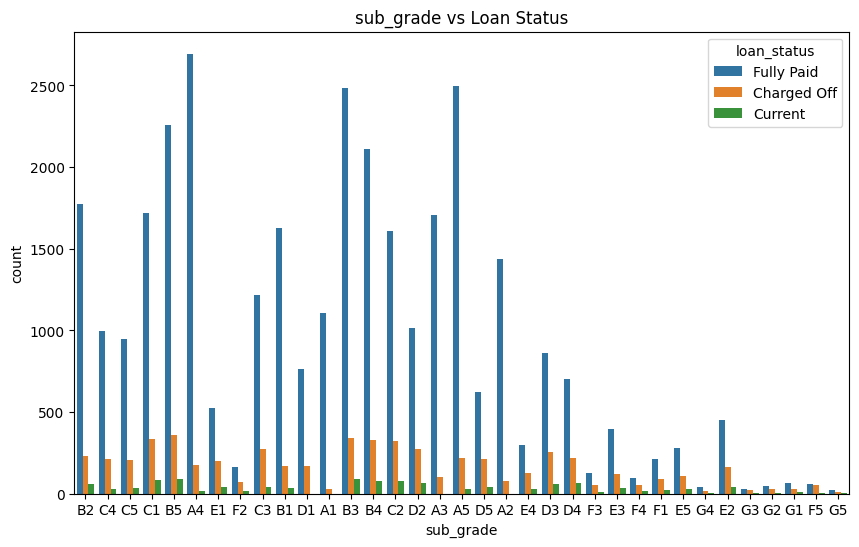

KeyboardInterrupt: 

In [140]:
# Bivariate Analysis for categorical features
for col in categorical_columns_new:
    if col != 'loan_status':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='loan_status', data=loan_clean_new)
        plt.title(f'{col} vs Loan Status')
        plt.show()

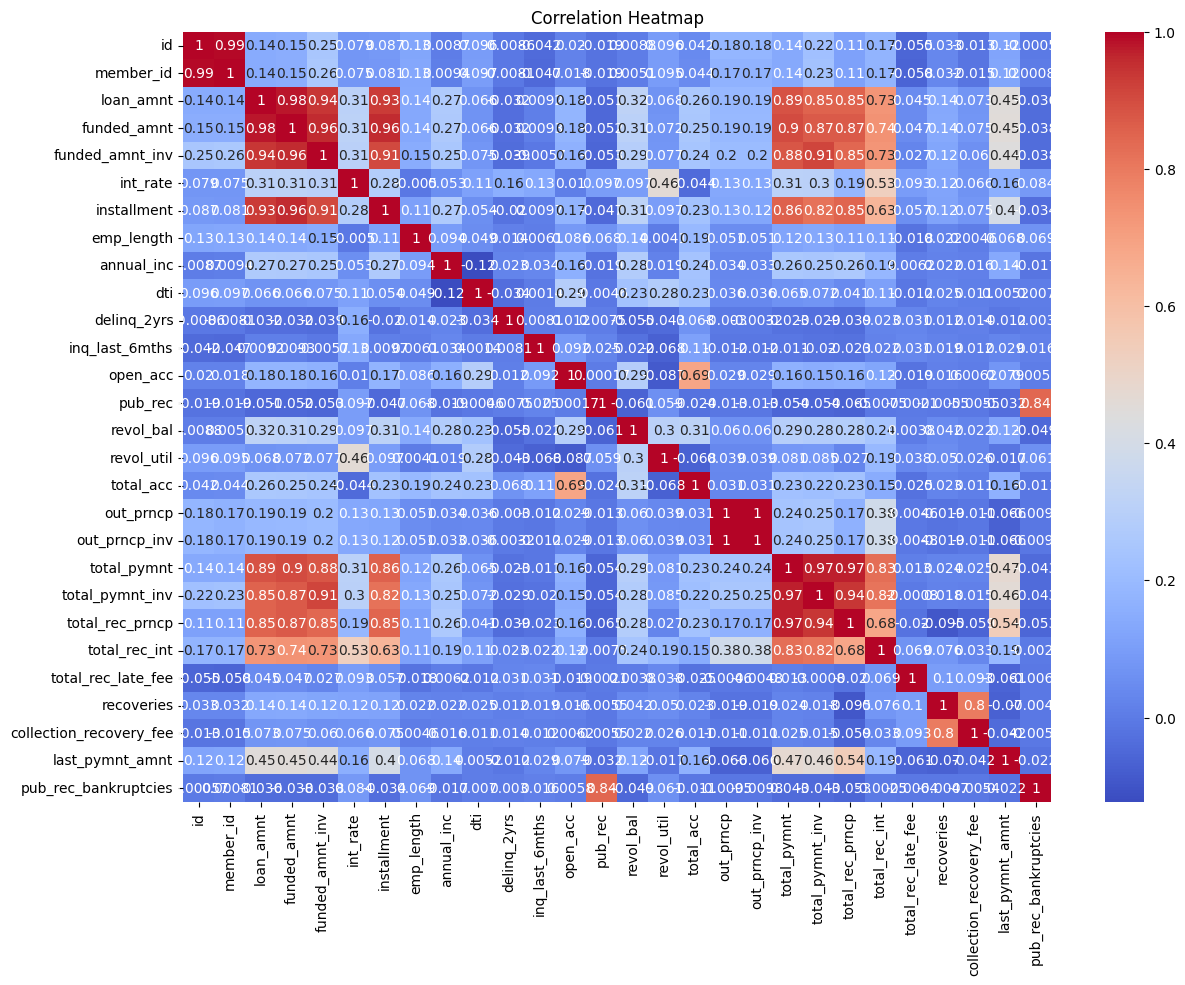

In [141]:
# Heatmap for numerical columns
plt.figure(figsize=(14, 10))
corr_matrix = loan_clean_new[numerical_columns_new].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Insights and Summary

## Key Findings
1. **Loan Amount:** Higher loan amounts tend to be associated with higher default rates.
2. **Annual Income:** Lower annual income is correlated with a higher likelihood of default.
3. **Term:** Loans with longer terms are more likely to default.
4. **Employment Length:** Shorter employment lengths are associated with higher default rates.
5. **Credit History:** Applicants with poor credit history (e.g., higher delinquencies, higher revolving utilization) are more likely to default.
